# Importing Data

Import library

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

Import dataset dari 12 saham perbankan dan mengambil hanya kolom close saja yang dibutuhkan untuk menghitung Value at Risk

In [2]:
import pandas as pd

file_names = [
    'nisp_hist.csv', 'bbri_hist.csv', 'bbtn_hist.csv', 'bbyb_hist.csv',
    'bmri_hist.csv', 'bnga_hist.csv', 'bris_hist.csv', 'bbca_hist.csv',
    'bbni_hist.csv', 'bank_hist.csv', 'arto_hist.csv', 'mega_hist.csv'
]

bank_names = [
    'Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon', 'Zeta', 'Eta', 'Theta',
    'Iota', 'Kappa', 'Lambda', 'Mu'
]

folder_path = "/content"

data_bank = {}

for file_name, bank_name in zip(file_names, bank_names):
    file_path = f"{folder_path}/{file_name}"
    try:
        df = pd.read_csv(file_path, parse_dates=True)
        data_bank[bank_name] = df[['Date', 'Close']].rename(columns={'Close': bank_name})
        print(f"Berhasil membaca data untuk {bank_name}")
    except FileNotFoundError:
        print(f"File untuk {bank_name} tidak ditemukan di {file_path}")
    except KeyError:
        print(f"Kolom 'date' atau 'Close' tidak ditemukan di dataset {bank_name}")
    except Exception as e:
        print(f"Terjadi kesalahan saat membaca data untuk {bank_name}: {e}")

df1 = pd.DataFrame()
for bank_name, df in data_bank.items():
    if df1.empty:
        df1 = df
    else:
        df1 = pd.merge(df1, df, on='Date', how='outer')

df1.to_csv(f"{folder_path}/combined_close.csv", index=False)

df1.head()

Berhasil membaca data untuk Alpha
Berhasil membaca data untuk Beta
Berhasil membaca data untuk Gamma
Berhasil membaca data untuk Delta
Berhasil membaca data untuk Epsilon
Berhasil membaca data untuk Zeta
Berhasil membaca data untuk Eta
Berhasil membaca data untuk Theta
Berhasil membaca data untuk Iota
Berhasil membaca data untuk Kappa
Berhasil membaca data untuk Lambda
Berhasil membaca data untuk Mu


Date       Alpha         Beta       Gamma  Delta  \
0  2014-04-21 00:00:00+07:00  598.604431  1238.436401  975.322571    NaN   
1  2014-04-22 00:00:00+07:00  598.604431  1256.920532  971.628357    NaN   
2  2014-04-23 00:00:00+07:00  598.604431  1235.355835  964.239441    NaN   
3  2014-04-24 00:00:00+07:00  598.604431  1238.436401  894.045715    NaN   
4  2014-04-25 00:00:00+07:00  598.604431  1232.274902  908.823364    NaN   

       Epsilon        Zeta  Eta        Theta         Iota  Kappa  Lambda  \
0  1725.420532  731.913696  NaN  1880.453247  1877.557129    NaN     NaN   
1  1729.810791  731.913696  NaN  1859.418945  1877.557129    NaN     NaN   
2  1738.591797  728.377991  NaN  1859.418945  1877.557129    NaN     NaN   
3  1734.201294  728.377991  NaN  1851.005127  1849.809692    NaN     NaN   
4  1738.591797  728.377991  NaN  1851.005127  1868.307861    NaN     NaN   

           Mu  
0  822.389038  
1  807.628235  
2  803.410767  
3  803.410767  
4  822.389038

# Data Wrangling

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2475 non-null   object 
 1   Alpha    2475 non-null   float64
 2   Beta     2475 non-null   float64
 3   Gamma    2475 non-null   float64
 4   Delta    2297 non-null   float64
 5   Epsilon  2475 non-null   float64
 6   Zeta     2474 non-null   float64
 7   Eta      1466 non-null   float64
 8   Theta    2475 non-null   float64
 9   Iota     2475 non-null   float64
 10  Kappa    778 non-null    float64
 11  Lambda   2045 non-null   float64
 12  Mu       2475 non-null   float64
dtypes: float64(12), object(1)
memory usage: 251.5+ KB


Setelah dilihat dari keseluruhan data, ternyata jumlah data dari setiap bank tidak sama, karena ada beberapa bank yang baru muncul beberapa tahun kebelakang, oleh karena itu untuk memudahkan proses selanjutnya dilakukan pemotongan periode ke bank yang paling muda yaitu Kappa dengan 778 data.

In [4]:
df1 = df1.tail(778)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 1697 to 2474
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     778 non-null    object 
 1   Alpha    778 non-null    float64
 2   Beta     778 non-null    float64
 3   Gamma    778 non-null    float64
 4   Delta    778 non-null    float64
 5   Epsilon  778 non-null    float64
 6   Zeta     778 non-null    float64
 7   Eta      778 non-null    float64
 8   Theta    778 non-null    float64
 9   Iota     778 non-null    float64
 10  Kappa    778 non-null    float64
 11  Lambda   778 non-null    float64
 12  Mu       778 non-null    float64
dtypes: float64(12), object(1)
memory usage: 79.1+ KB


Setelah dipotong tidak ada lagi data null

In [6]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [7]:
def plot_separate_stocks(data):
    # Pastikan 'Date' adalah datetime dan konversi menjadi ordinal untuk perhitungan tren
    data['Date'] = pd.to_datetime(data['Date'])
    data['Date_ordinal'] = data['Date'].apply(lambda x: x.toordinal())

    # Jumlah saham (hanya mengabaikan kolom 'Date' dan 'Date_ordinal')
    num_stocks = len(data.columns) - 2  # Mengurangi kolom 'Date' dan 'Date_ordinal'
    num_rows = num_stocks // 4 + (num_stocks % 4 > 0)  # Menambah baris jika ada sisa
    fig, axs = plt.subplots(num_rows, 4, figsize=(20, 15))
    fig.suptitle('Close Price of Each Stock Over Time with Trend Lines', fontsize=16)

    # Loop melalui kolom stok yang dimulai setelah 'Date' dan 'Date_ordinal'
    for i, column in enumerate(data.columns[1:-1]):  # -1 untuk menghindari 'Date_ordinal'
        ax = axs.flatten()[i]  # Flatten axs array untuk indexing yang lebih mudah
        ax.plot(data['Date'], data[column], label=column)

        # Menambahkan garis tren
        z = np.polyfit(data['Date_ordinal'], data[column], 1)
        p = np.poly1d(z)
        ax.plot(data['Date'], p(data['Date_ordinal']), "r--", label='Trend Line')

        ax.set_title(column)
        ax.set_xlabel('Date')
        ax.set_ylabel('Close Price')
        ax.grid(True)
        ax.legend()
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

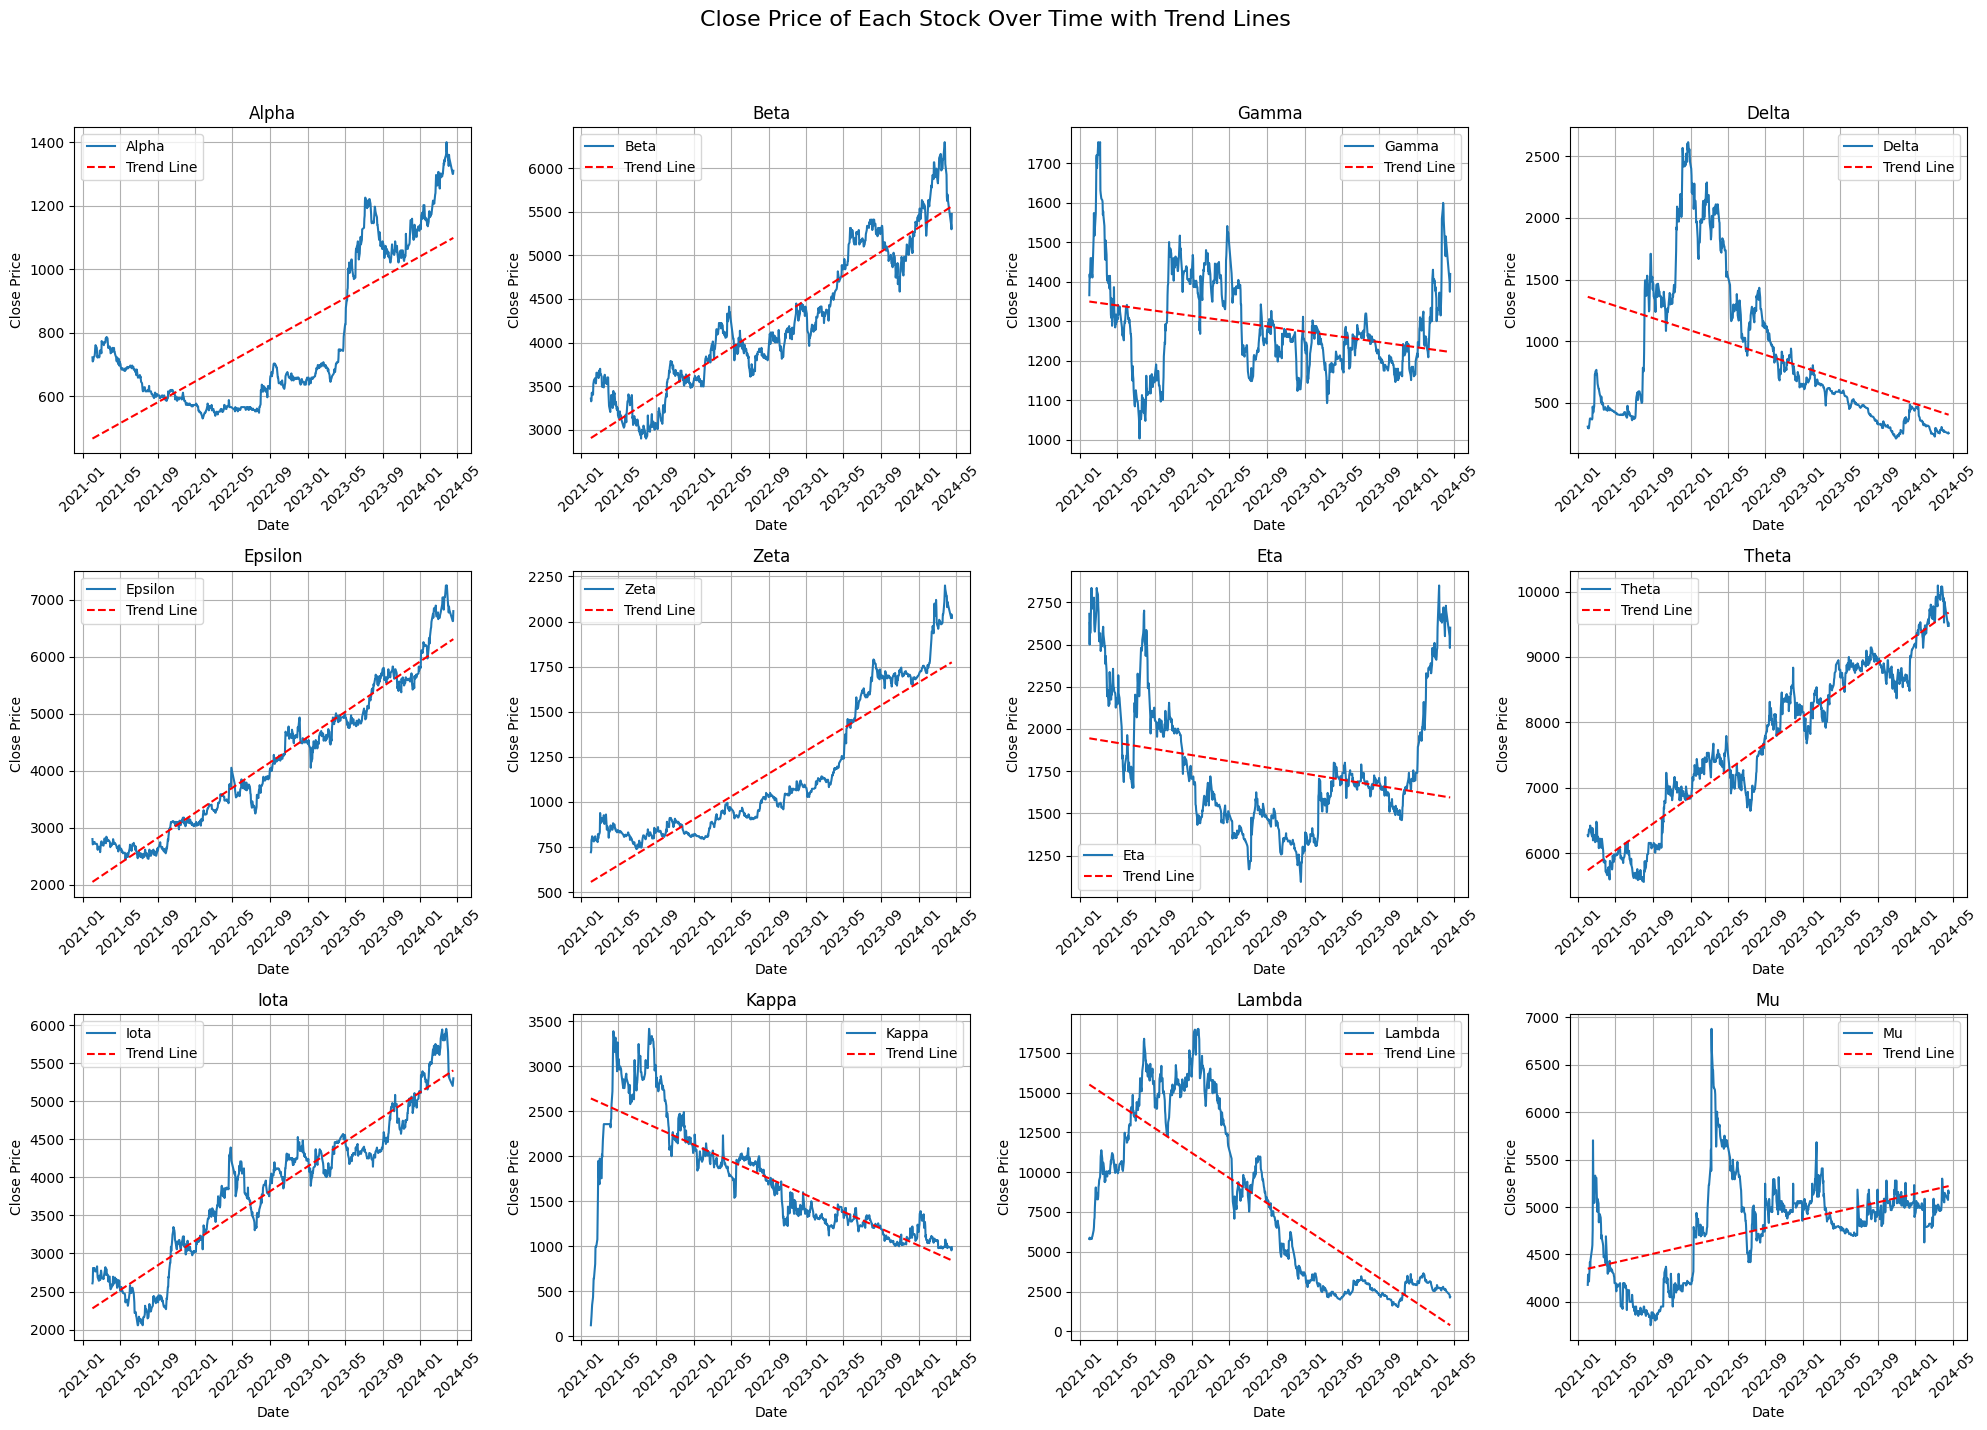

In [8]:
plot_separate_stocks(df1)

Dikarenakan data saham dari rentang 2020 - 2022 pertengahan sangat terpengaruh oleh covid19 sehingga banyak penurunan dari segi harga, yang mana hal tersebut mengakibatkan pola data tersebut terganggu, sehingga data saham dipotong lagi periodenya dari 2022-04-18 dan juga agar periode datanya tepat 2 tahun.

In [9]:
df1 = df1[df1['Date'] >= '2022-04-18']

In [10]:
df1

Date        Alpha         Beta        Gamma  \
1995 2022-04-18 00:00:00+07:00   570.442993  4063.734375  1330.590088   
1996 2022-04-19 00:00:00+07:00   570.442993  4081.596924  1347.119141   
1997 2022-04-20 00:00:00+07:00   588.131165  4331.672852  1376.044922   
1998 2022-04-21 00:00:00+07:00   574.865051  4287.016602  1454.558105   
1999 2022-04-22 00:00:00+07:00   566.020935  4242.359863  1466.954956   
...                        ...          ...          ...          ...   
2470 2024-04-04 00:00:00+07:00  1360.000000  5700.000000  1515.000000   
2471 2024-04-05 00:00:00+07:00  1350.000000  5650.000000  1500.000000   
2472 2024-04-16 00:00:00+07:00  1300.000000  5350.000000  1400.000000   
2473 2024-04-17 00:00:00+07:00  1300.000000  5300.000000  1375.000000   
2474 2024-04-18 00:00:00+07:00  1310.000000  5475.000000  1420.000000   

            Delta      Epsilon         Zeta          Eta        Theta  \
1995  1811.448486  3450.868408   986.968872  1547.010986  7315.464844   
1996  1769.430420  3428.239746   982.769043  1508.694824  7244.209961   
1997  1774.098999  3552.697266   995.620728  1489.536743  7267.961426   
1998  1764.761719  3756.355225   977.352478  1494.326294  7529.228516   
1999  1736.749634  3745.040771   963.651245  1470.378662  7481.724609   
...           ...          ...          ...          ...          ...   
2470   270.000000  6875.000000  2110.000000  2730.000000  9850.000000   
2471   268.000000  6825.000000  2100.000000  2700.000000  9825.000000   
2472   252.000000  6625.000000  2020.000000  2550.000000  9475.000000   
2473   260.000000  6625.000000  2040.000000  2480.000000  9525.000000   
2474   254.000000  6800.000000  2020.000000  2600.000000  9475.000000   

             Iota        Kappa   Lambda           Mu  Date_ordinal  
1995  3854.148682  1866.850830  12825.0  5660.846680        738263  
1996  3842.712158  1866.850830  12575.0  5614.823242        738264  
1997  4105.754883  1866.850830  12400.0  5637.834473        738265  
1998  4288.741211  1884.630371  12425.0  5752.892578        738266  
1999  4277.304688  1840.181519  12400.0  5706.869141        738267  
...           ...          ...      ...          ...           ...  
2470  5350.000000   980.000000   2580.0  5050.000000        738980  
2471  5300.000000  1000.000000   2530.0  5150.000000        738981  
2472  5200.000000   980.000000   2300.0  5075.000000        738992  
2473  5250.000000   955.000000   2120.0  5175.000000        738993  
2474  5300.000000   990.000000   2160.0  5150.000000        738994  

[480 rows x 14 columns]

Dikarenakan tim kami akan menggunakan algoritma prophet dan membutuhkan hari libur, maka kita ekstrak hari libur diambil dari data tanggal yang tidak ada di dataset.

In [11]:
dates = pd.to_datetime(df1['Date'])

# Create a date range from the minimum to the maximum date in the dataset
full_range = pd.date_range(start=dates.min(), end=dates.max())

# Identify the missing dates
missing_dates = full_range.difference(dates)

In [12]:
missing_dates

DatetimeIndex(['2022-04-23 00:00:00+07:00', '2022-04-24 00:00:00+07:00',
               '2022-04-29 00:00:00+07:00', '2022-04-30 00:00:00+07:00',
               '2022-05-01 00:00:00+07:00', '2022-05-02 00:00:00+07:00',
               '2022-05-03 00:00:00+07:00', '2022-05-04 00:00:00+07:00',
               '2022-05-05 00:00:00+07:00', '2022-05-06 00:00:00+07:00',
               ...
               '2024-04-06 00:00:00+07:00', '2024-04-07 00:00:00+07:00',
               '2024-04-08 00:00:00+07:00', '2024-04-09 00:00:00+07:00',
               '2024-04-10 00:00:00+07:00', '2024-04-11 00:00:00+07:00',
               '2024-04-12 00:00:00+07:00', '2024-04-13 00:00:00+07:00',
               '2024-04-14 00:00:00+07:00', '2024-04-15 00:00:00+07:00'],
              dtype='datetime64[ns, UTC+07:00]', length=252, freq=None)

In [13]:
holidays = pd.DataFrame({
    'holiday': 'market_closed',
    'ds': pd.to_datetime(missing_dates),
    'lower_window': 0,
    'upper_window': 0,
})

holidays['ds'] = holidays['ds'].dt.strftime('%Y-%m-%d')

holidays

holiday          ds  lower_window  upper_window
0    market_closed  2022-04-23             0             0
1    market_closed  2022-04-24             0             0
2    market_closed  2022-04-29             0             0
3    market_closed  2022-04-30             0             0
4    market_closed  2022-05-01             0             0
..             ...         ...           ...           ...
247  market_closed  2024-04-11             0             0
248  market_closed  2024-04-12             0             0
249  market_closed  2024-04-13             0             0
250  market_closed  2024-04-14             0             0
251  market_closed  2024-04-15             0             0

[252 rows x 4 columns]

Didapatkan 252rows tanggal libur

In [14]:
holidays.to_csv("holidays.csv")

In [15]:
df1.to_csv("data_close.csv")

Data disimpan ke csv terlebih dahulu dan diupload ke google sheet agar tidak perlu upload ulang lagi 12 dataset, untuk memudahkan proses selanjutnya

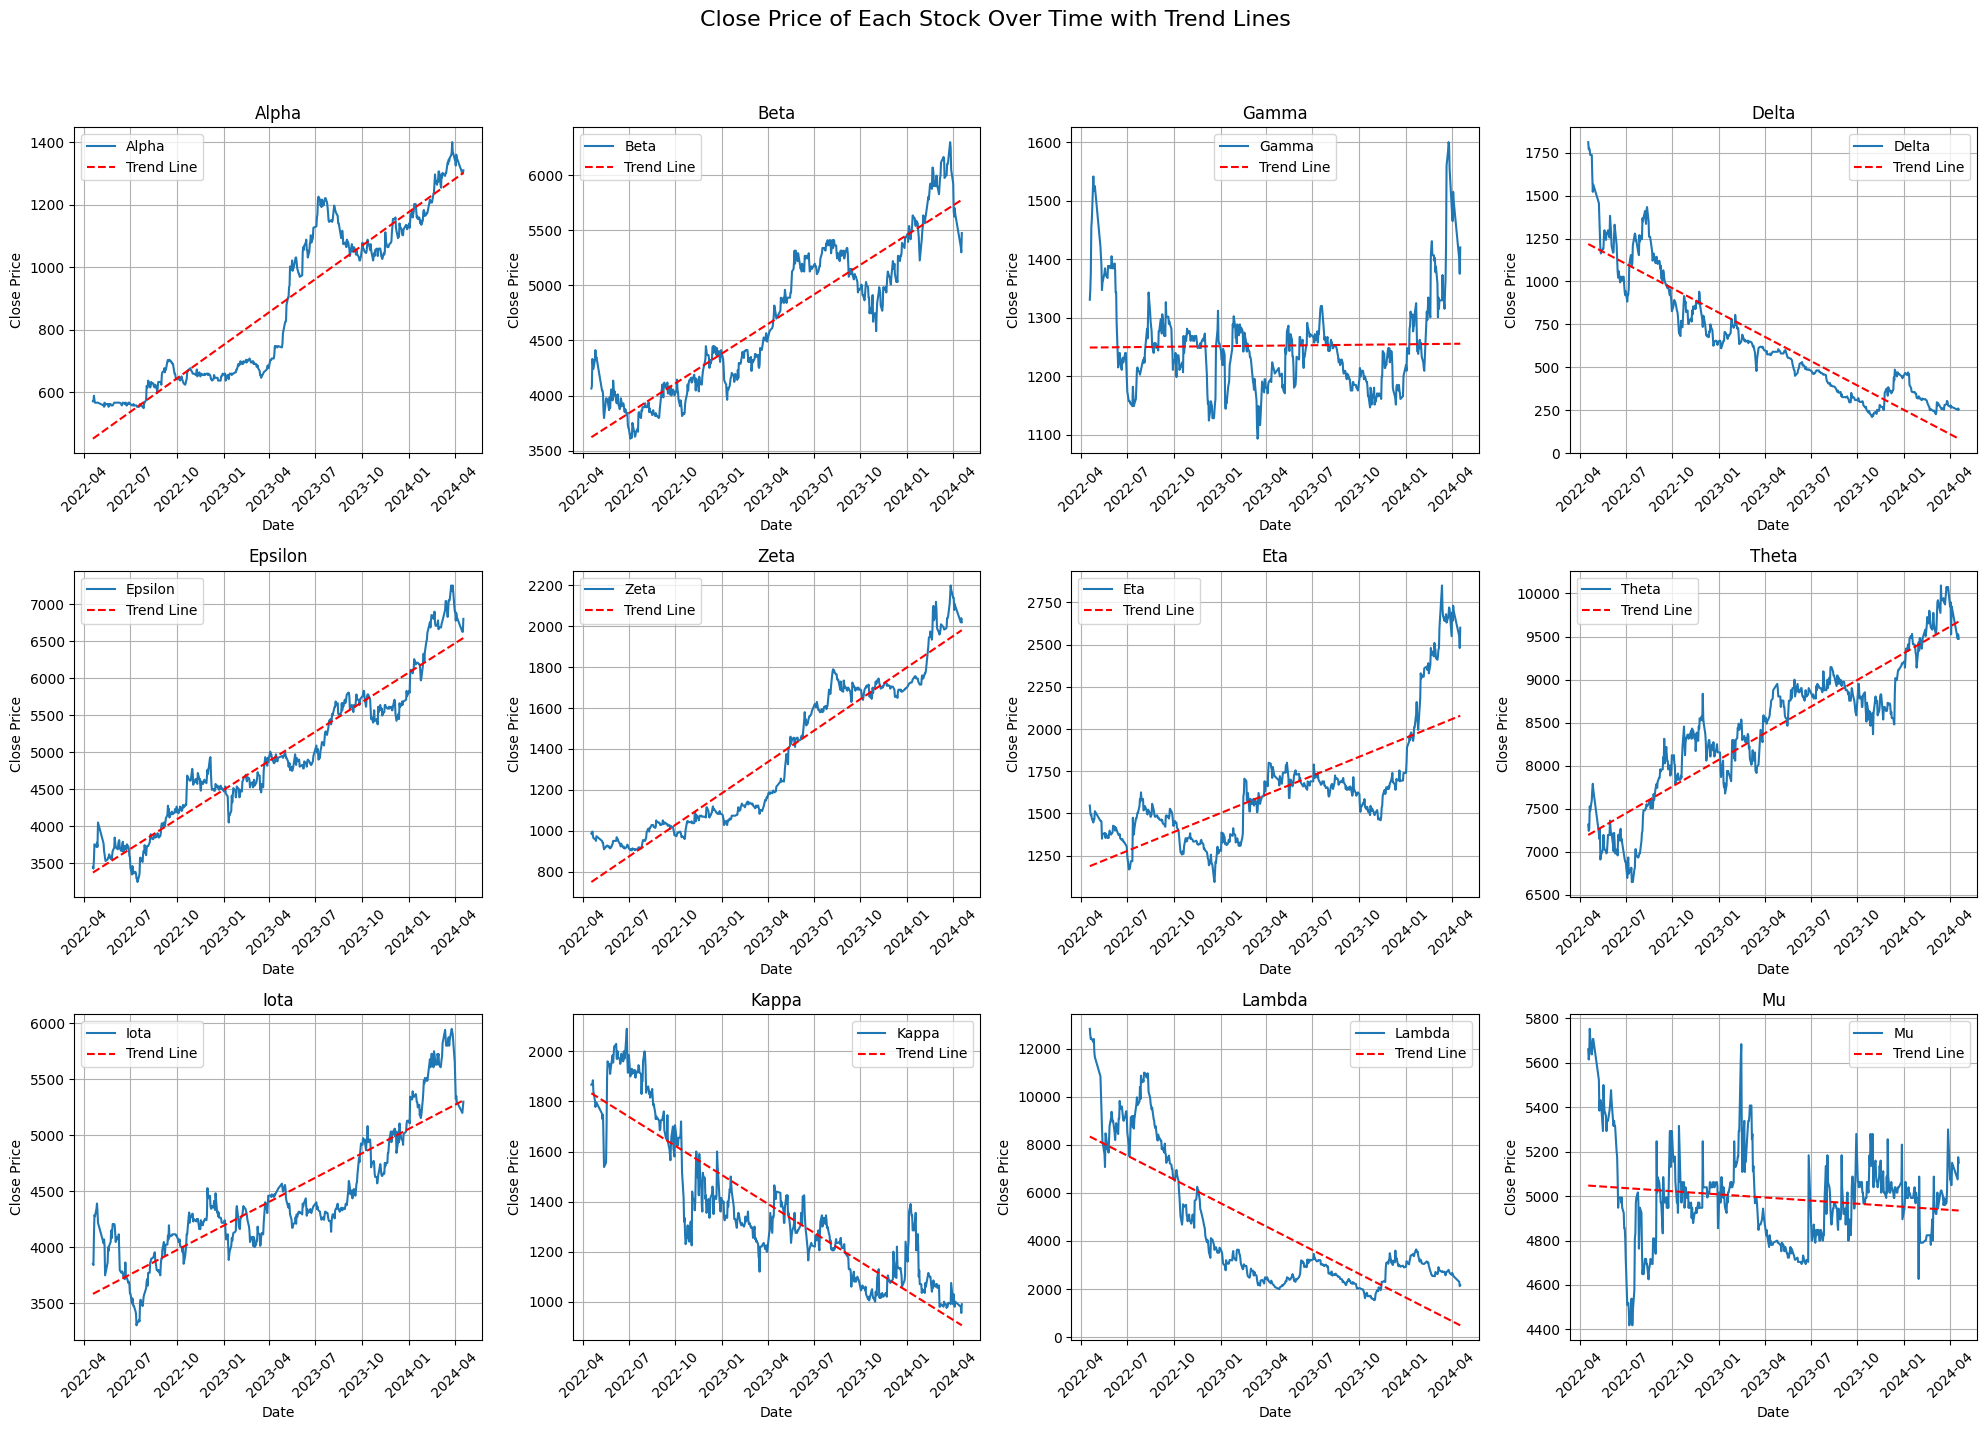

In [16]:
plot_separate_stocks(df1)

Dapat dilihat setelah dilakukan pemotongan periode terakhir trend data ataupun pola sudah meminimalisir pengaruh dari covid19

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1995 to 2474
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype                    
---  ------        --------------  -----                    
 0   Date          480 non-null    datetime64[ns, UTC+07:00]
 1   Alpha         480 non-null    float64                  
 2   Beta          480 non-null    float64                  
 3   Gamma         480 non-null    float64                  
 4   Delta         480 non-null    float64                  
 5   Epsilon       480 non-null    float64                  
 6   Zeta          480 non-null    float64                  
 7   Eta           480 non-null    float64                  
 8   Theta         480 non-null    float64                  
 9   Iota          480 non-null    float64                  
 10  Kappa         480 non-null    float64                  
 11  Lambda        480 non-null    float64                  
 12  Mu            480 non-null    float64

Jumlah data sebanyak 480 dengan rentang tanggal 2 tahun, yang harusnya lebih dari 720 data, itu dikarenakan data saham ini mengabaikan hari libur, karena saat libur saham ditutup.

In [18]:
df1.isna().sum()

Date            0
Alpha           0
Beta            0
Gamma           0
Delta           0
Epsilon         0
Zeta            0
Eta             0
Theta           0
Iota            0
Kappa           0
Lambda          0
Mu              0
Date_ordinal    0
dtype: int64

In [19]:
print(min(df1['Date']))
print(max(df1['Date']))

2022-04-18 00:00:00+07:00
2024-04-18 00:00:00+07:00


In [20]:
df1 = df1.drop(columns="Date_ordinal")

In [21]:
df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')

dilakukan reformat untuk data tanggal agar lebih mudah untuk pemrosesan.

In [22]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1995 to 2474
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     480 non-null    datetime64[ns]
 1   Alpha    480 non-null    float64       
 2   Beta     480 non-null    float64       
 3   Gamma    480 non-null    float64       
 4   Delta    480 non-null    float64       
 5   Epsilon  480 non-null    float64       
 6   Zeta     480 non-null    float64       
 7   Eta      480 non-null    float64       
 8   Theta    480 non-null    float64       
 9   Iota     480 non-null    float64       
 10  Kappa    480 non-null    float64       
 11  Lambda   480 non-null    float64       
 12  Mu       480 non-null    float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 52.5 KB


dikarenakan ingin melakuakn forecasting time series maka datanya juga harus time series tidak boleh ada data yang kosong oleh karena itu data tanggal direindex sesuai rentang yang sudah ditentukan.

In [24]:
df1 = df1.set_index('Date')
df1 = df1.reindex(pd.date_range(start="2022-04-18", end="2024-04-18"))

In [25]:
df1.head(10)

Alpha         Beta        Gamma        Delta      Epsilon  \
2022-04-18  570.442993  4063.734375  1330.590088  1811.448486  3450.868408   
2022-04-19  570.442993  4081.596924  1347.119141  1769.430420  3428.239746   
2022-04-20  588.131165  4331.672852  1376.044922  1774.098999  3552.697266   
2022-04-21  574.865051  4287.016602  1454.558105  1764.761719  3756.355225   
2022-04-22  566.020935  4242.359863  1466.954956  1736.749634  3745.040771   
2022-04-23         NaN          NaN          NaN          NaN          NaN   
2022-04-24         NaN          NaN          NaN          NaN          NaN   
2022-04-25  566.020935  4322.742188  1541.335693  1736.749634  3722.412109   
2022-04-26  566.020935  4412.055176  1516.542114  1615.363892  3778.983887   
2022-04-27  566.020935  4331.672852  1516.542114  1521.990234  3722.412109   

                  Zeta          Eta        Theta         Iota        Kappa  \
2022-04-18  986.968872  1547.010986  7315.464844  3854.148682  1866.850830   
2022-04-19  982.769043  1508.694824  7244.209961  3842.712158  1866.850830   
2022-04-20  995.620728  1489.536743  7267.961426  4105.754883  1866.850830   
2022-04-21  977.352478  1494.326294  7529.228516  4288.741211  1884.630371   
2022-04-22  963.651245  1470.378662  7481.724609  4277.304688  1840.181519   
2022-04-23         NaN          NaN          NaN          NaN          NaN   
2022-04-24         NaN          NaN          NaN          NaN          NaN   
2022-04-25  959.084229  1446.431274  7600.482910  4345.924316  1804.622559   
2022-04-26  959.084229  1465.589233  7719.240234  4391.670898  1777.953247   
2022-04-27  949.950073  1465.589233  7790.495117  4323.051270  1786.843018   

             Lambda           Mu  
2022-04-18  12825.0  5660.846680  
2022-04-19  12575.0  5614.823242  
2022-04-20  12400.0  5637.834473  
2022-04-21  12425.0  5752.892578  
2022-04-22  12400.0  5706.869141  
2022-04-23      NaN          NaN  
2022-04-24      NaN          NaN  
2022-04-25  12275.0  5637.834473  
2022-04-26  12400.0  5660.846680  
2022-04-27  11850.0  5706.869141

dapat dilihat sesudah dilakukan reindex ada nilai nan yang muncul karena data tanggal baru ditambahkan namun data nilai sahamnya tidak ada untuk data tersebut

In [26]:
df1 = df1.fillna(method='ffill').fillna(method='bfill')

sehingga dilakukan pengisian missing value, dengan menggunakan ffil dan bfill karena teknik ini yang biasa digunakan untuk data time series.

In [27]:
df1.head(10)

Alpha         Beta        Gamma        Delta      Epsilon  \
2022-04-18  570.442993  4063.734375  1330.590088  1811.448486  3450.868408   
2022-04-19  570.442993  4081.596924  1347.119141  1769.430420  3428.239746   
2022-04-20  588.131165  4331.672852  1376.044922  1774.098999  3552.697266   
2022-04-21  574.865051  4287.016602  1454.558105  1764.761719  3756.355225   
2022-04-22  566.020935  4242.359863  1466.954956  1736.749634  3745.040771   
2022-04-23  566.020935  4242.359863  1466.954956  1736.749634  3745.040771   
2022-04-24  566.020935  4242.359863  1466.954956  1736.749634  3745.040771   
2022-04-25  566.020935  4322.742188  1541.335693  1736.749634  3722.412109   
2022-04-26  566.020935  4412.055176  1516.542114  1615.363892  3778.983887   
2022-04-27  566.020935  4331.672852  1516.542114  1521.990234  3722.412109   

                  Zeta          Eta        Theta         Iota        Kappa  \
2022-04-18  986.968872  1547.010986  7315.464844  3854.148682  1866.850830   
2022-04-19  982.769043  1508.694824  7244.209961  3842.712158  1866.850830   
2022-04-20  995.620728  1489.536743  7267.961426  4105.754883  1866.850830   
2022-04-21  977.352478  1494.326294  7529.228516  4288.741211  1884.630371   
2022-04-22  963.651245  1470.378662  7481.724609  4277.304688  1840.181519   
2022-04-23  963.651245  1470.378662  7481.724609  4277.304688  1840.181519   
2022-04-24  963.651245  1470.378662  7481.724609  4277.304688  1840.181519   
2022-04-25  959.084229  1446.431274  7600.482910  4345.924316  1804.622559   
2022-04-26  959.084229  1465.589233  7719.240234  4391.670898  1777.953247   
2022-04-27  949.950073  1465.589233  7790.495117  4323.051270  1786.843018   

             Lambda           Mu  
2022-04-18  12825.0  5660.846680  
2022-04-19  12575.0  5614.823242  
2022-04-20  12400.0  5637.834473  
2022-04-21  12425.0  5752.892578  
2022-04-22  12400.0  5706.869141  
2022-04-23  12400.0  5706.869141  
2022-04-24  12400.0  5706.869141  
2022-04-25  12275.0  5637.834473  
2022-04-26  12400.0  5660.846680  
2022-04-27  11850.0  5706.869141

dapat dilihat setelah dilakukan ffill dan bfill sudah tidak ada lagi data null, karena sudah diisi menggunakan data sebelum dan sesudahnya

<Axes: >

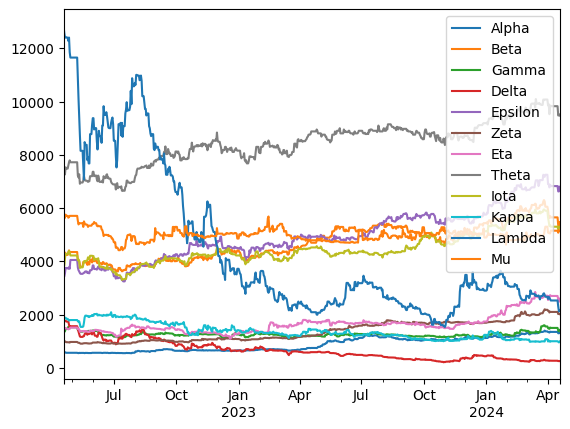

In [28]:
df1.plot()

# EDA

In [29]:
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonal_decomposition(df, column_name):

    result_mul = seasonal_decompose(df[column_name], model='multiplicative', extrapolate_trend='freq')
    result_add = seasonal_decompose(df[column_name], model='additive', extrapolate_trend='freq')

    return result_mul, result_add

def plot(result_mul, result_add):

    fig = px.line(title='Multiplicative Decomposition')
    fig.add_scatter(x=result_mul.trend.index, y=result_mul.trend, mode='lines', name='Trend')
    fig.add_scatter(x=result_mul.seasonal.index, y=result_mul.seasonal, mode='lines', name='Seasonal')
    fig.add_scatter(x=result_mul.resid.index, y=result_mul.resid, mode='lines', name='Residual')

    fig.update_layout(xaxis_title='Date', yaxis_title='Value')
    fig.show()

    fig = px.line(title='Additive Decomposition')
    fig.add_scatter(x=result_add.trend.index, y=result_add.trend, mode='lines', name='Trend')
    fig.add_scatter(x=result_add.seasonal.index, y=result_add.seasonal, mode='lines', name='Seasonal')
    fig.add_scatter(x=result_add.resid.index, y=result_add.resid, mode='lines', name='Residual')

    fig.update_layout(xaxis_title='Date', yaxis_title='Value')
    fig.show()

In [30]:
result_mul, result_add = seasonal_decomposition(df1, 'Beta')

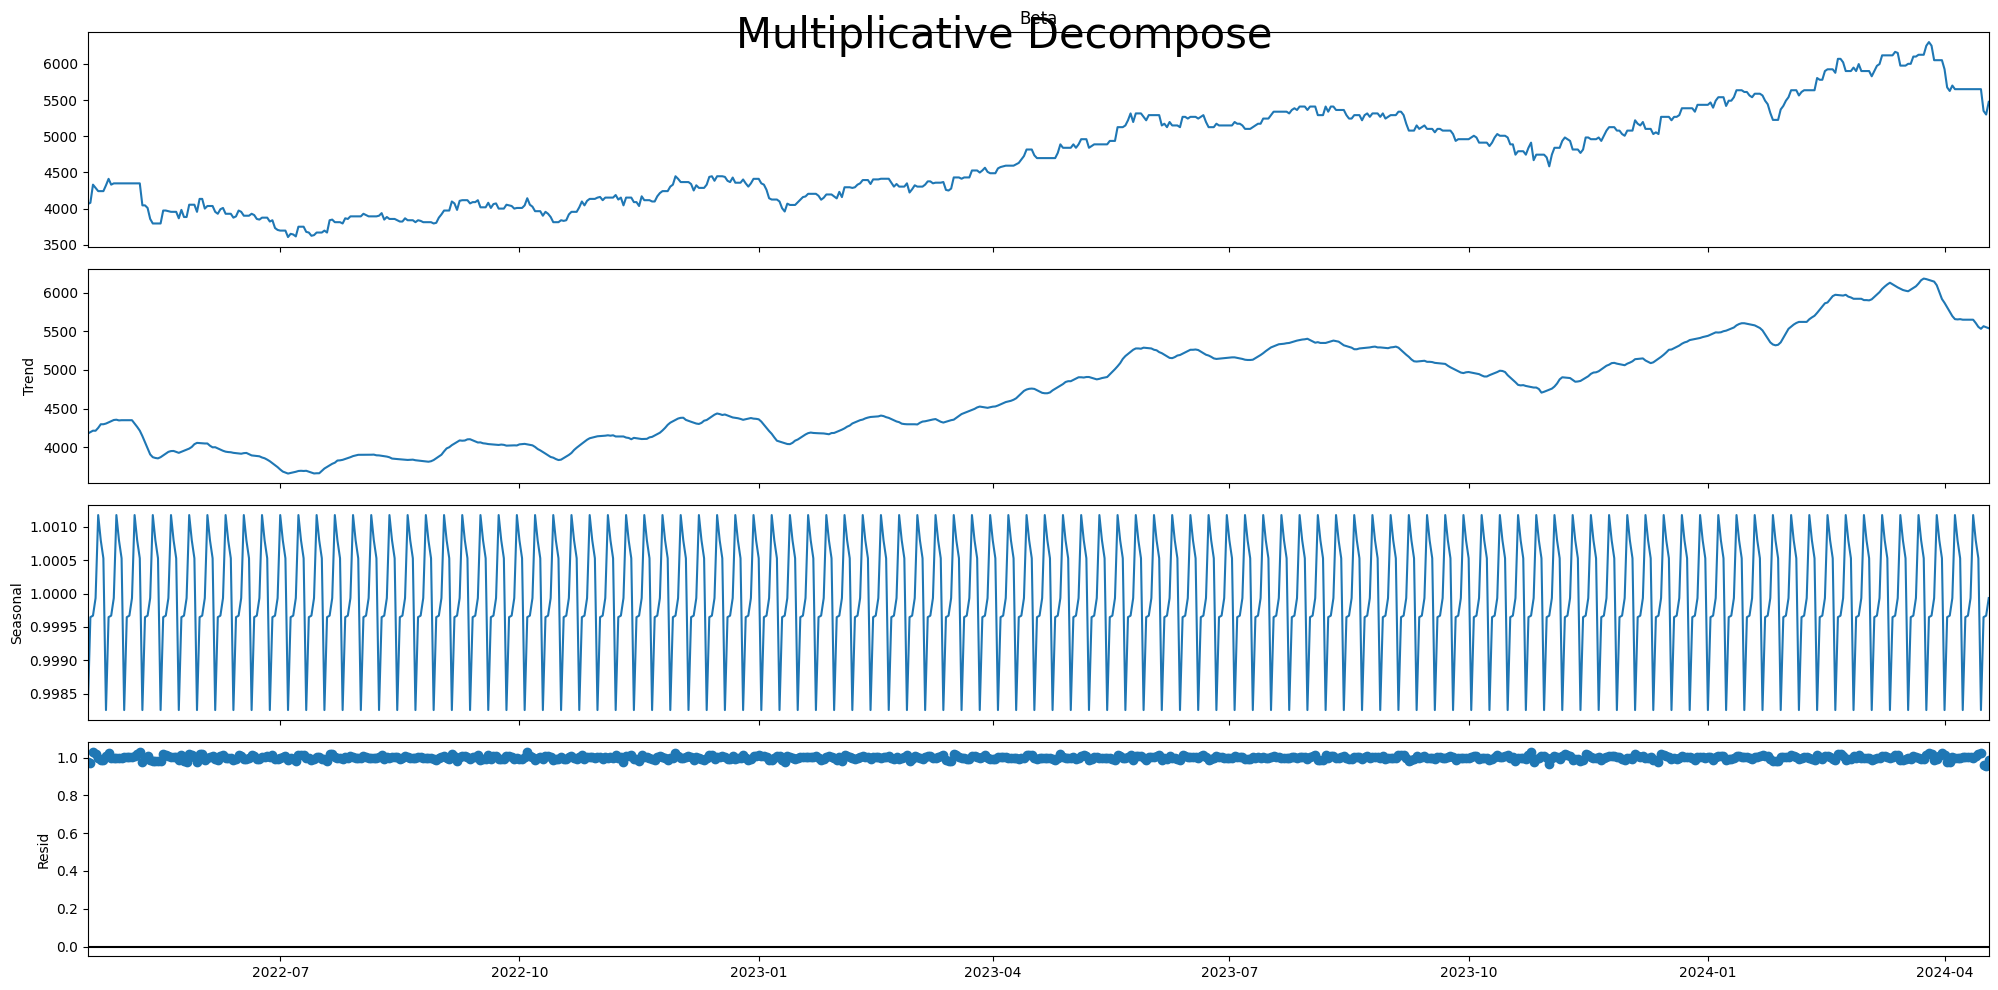

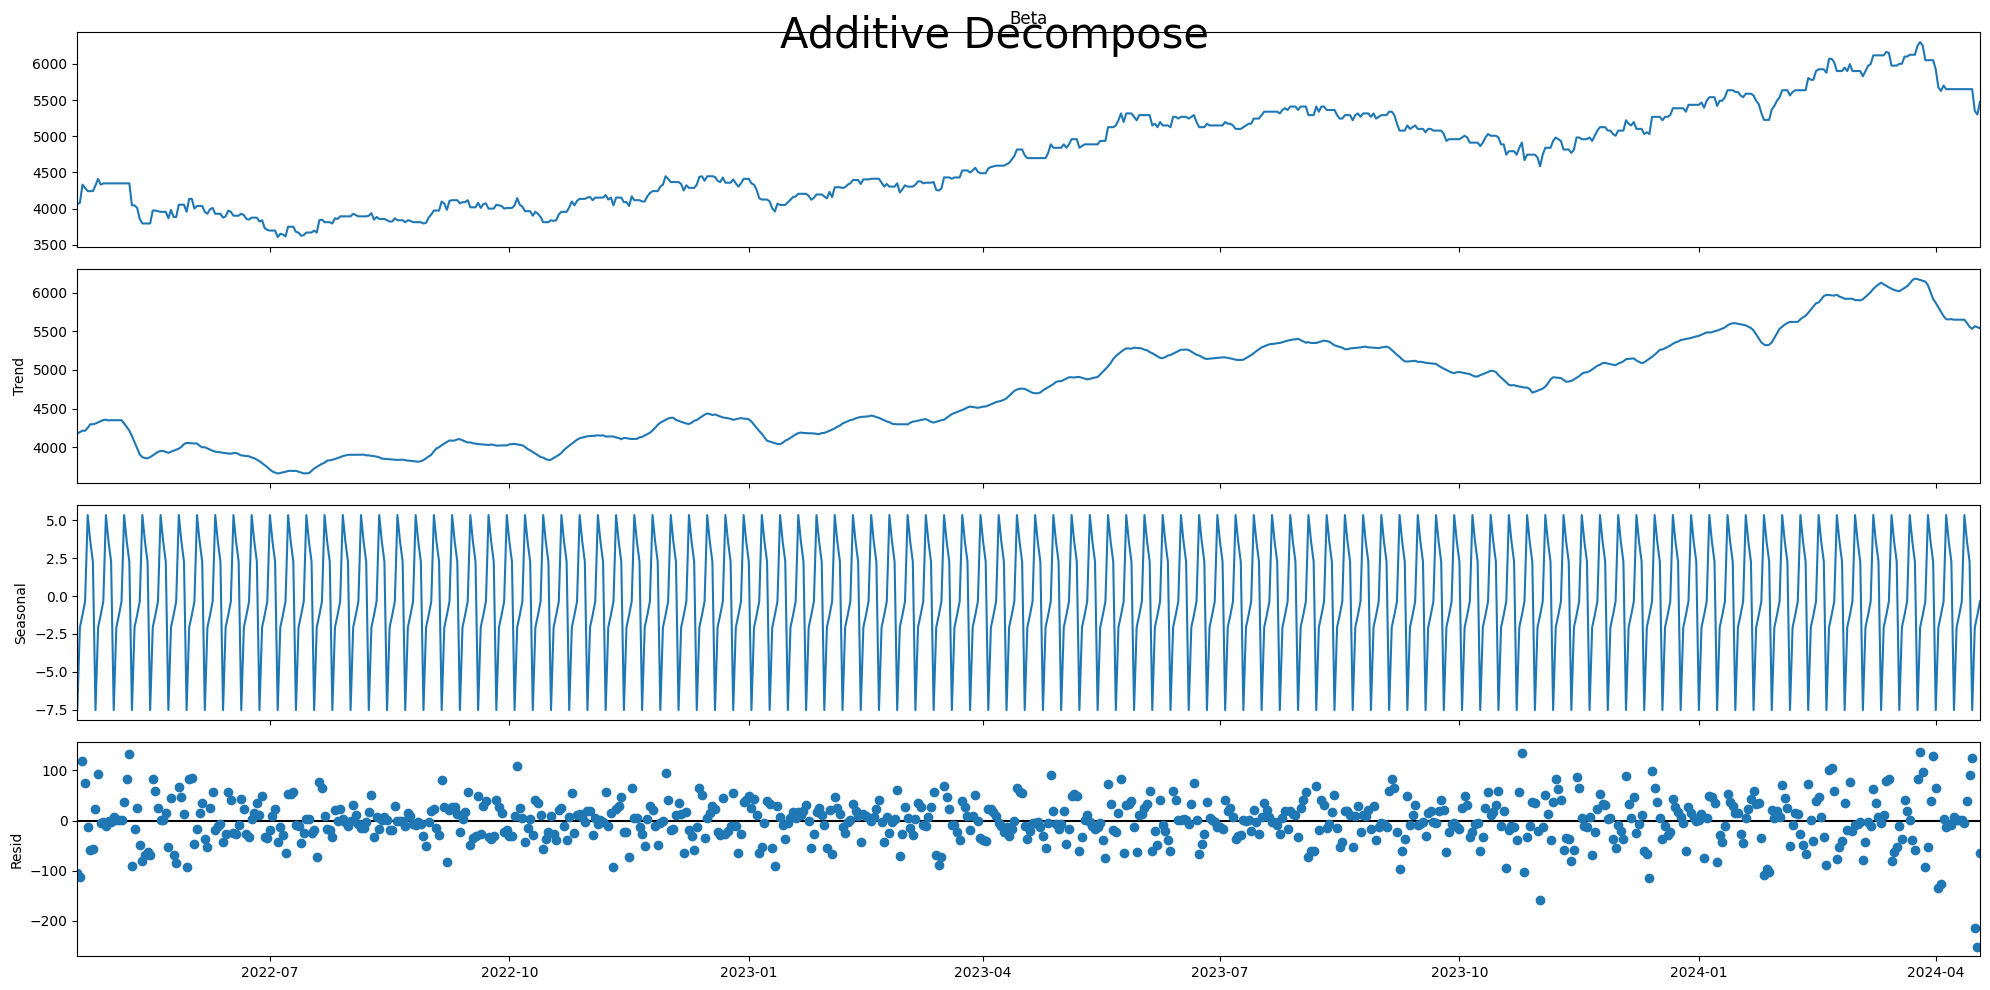

In [31]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (20, 10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=30)
result_add.plot().suptitle('Additive Decompose', fontsize=30)
plt.show()

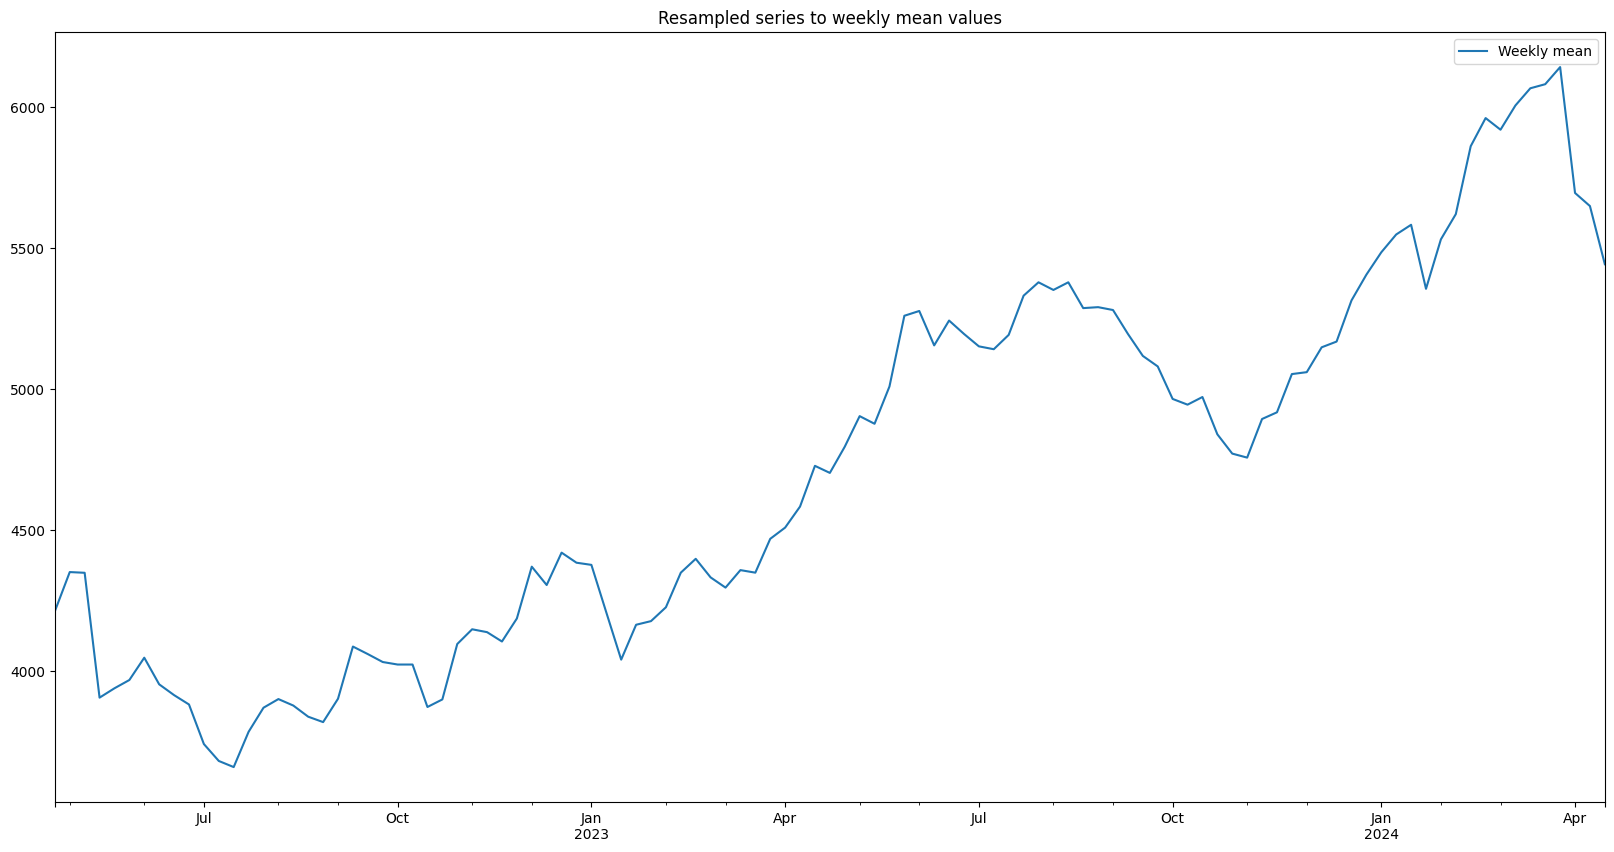

In [32]:
# Looking for weekly seasonality
resample = df1.resample('W')
weekly_mean = resample.mean()
weekly_mean.Beta.plot(label='Weekly mean')
plt.title("Resampled series to weekly mean values")
plt.legend()

/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-33-8d8171e89318>:7: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(X, y, degree)


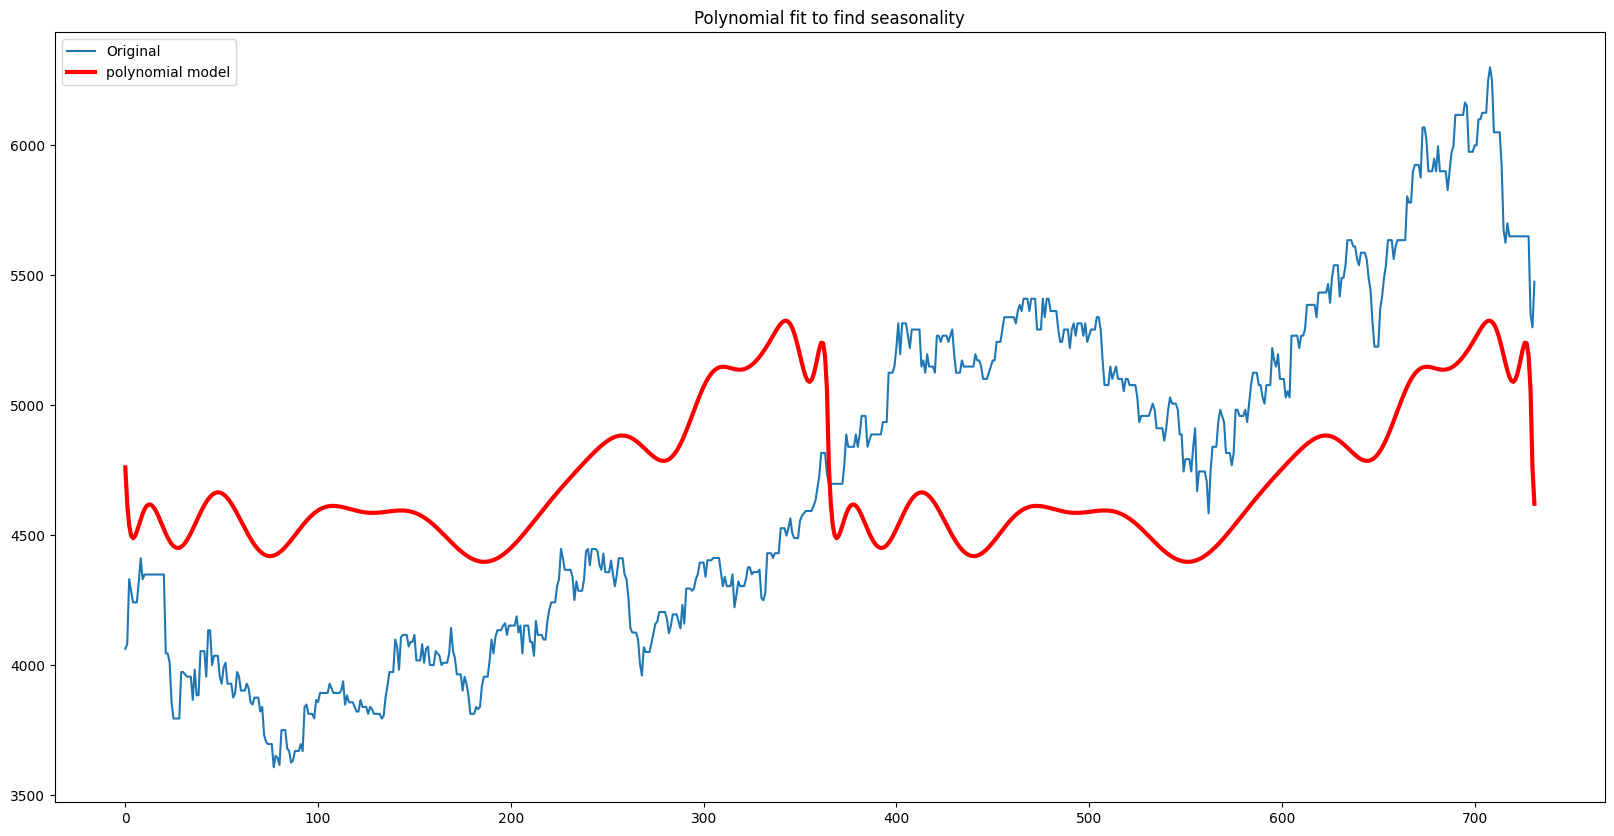

In [33]:
# Fix xticks to show dates
# fit polynomial: x^2*b1 + x*b2 + ... + bn
series = df1.Beta.values
X = [i % 365 for i in range(0, len(series))]
y = series
degree = 100
coef = np.polyfit(X, y, degree)
# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
# plot curve over original data
plt.plot(series, label='Original')
plt.plot(curve, color='red', linewidth=3, label='polynomial model')
plt.legend()
plt.title("Polynomial fit to find seasonality")
plt.show()

In [34]:
df1.to_csv("Final Close.csv")

# Modeling


Importing data yang sudah dilakukan preprocessing agar tidak perlu upload data secara manual lagi

In [42]:
data = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT1gDKWJFQ87o_gRGvYKhmtEh2o8GiBQzEd_b66z65fBnYVX_MJUhfu-xq3ws7ljcWzbAzuNFzjxosQ/pub?gid=2056150790&single=true&output=csv"

In [43]:
df1 = pd.read_csv(data, parse_dates=True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1 = df1.set_index("Date")

Install ARIMA Library

In [44]:
pip install pmdarima

In [45]:
from statsmodels.tsa.ar_model import AR
import pmdarima as pm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm
from prophet import Prophet

Splitting data train dan test

In [46]:
#prepare data before modeling
# We split our dataset to be able to evaluate our models

resultsDict = {}
predictionsDict = {}

split_date = '2023-11-24'
df_training = df1.loc[df1.index <= split_date]
df_test = df1.loc[df1.index > split_date]
print(f"{len(df_training)} days of training data \n {len(df_test)} days of testing data ")

586 days of training data 
 146 days of testing data 


In [47]:
df_test.tail(7)

Beta   Gamma  Delta  Epsilon    Zeta     Eta   Theta    Iota  \
Date                                                                         
2024-04-12  5650.0  1500.0  268.0   6825.0  2100.0  2700.0  9825.0  5300.0   
2024-04-13  5650.0  1500.0  268.0   6825.0  2100.0  2700.0  9825.0  5300.0   
2024-04-14  5650.0  1500.0  268.0   6825.0  2100.0  2700.0  9825.0  5300.0   
2024-04-15  5650.0  1500.0  268.0   6825.0  2100.0  2700.0  9825.0  5300.0   
2024-04-16  5350.0  1400.0  252.0   6625.0  2020.0  2550.0  9475.0  5200.0   
2024-04-17  5300.0  1375.0  260.0   6625.0  2040.0  2480.0  9525.0  5250.0   
2024-04-18  5475.0  1420.0  254.0   6800.0  2020.0  2600.0  9475.0  5300.0   

             Kappa  Lambda      Mu   Alpha  
Date                                        
2024-04-12  1000.0    2530  5150.0  1350.0  
2024-04-13  1000.0    2530  5150.0  1350.0  
2024-04-14  1000.0    2530  5150.0  1350.0  
2024-04-15  1000.0    2530  5150.0  1350.0  
2024-04-16   980.0    2300  5075.0  1300.0  
2024-04-17   955.0    2120  5175.0  1300.0  
2024-04-18   990.0    2160  5150.0  1310.0

### ARIMA

In [48]:
autoModel = pm.auto_arima(df_training.Beta, trace=True,
                          error_action='ignore', suppress_warnings=True, seasonal=True)
autoModel.fit(df_training.Beta)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6307.804, Time=2.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6311.291, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6307.272, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6306.441, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6309.975, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6307.557, Time=0.86 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6306.928, Time=0.96 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6308.768, Time=2.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6305.303, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6306.464, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=6305.845, Time=0.44 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6306.100, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=6307.679, Time=0.64 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 8.795 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [50]:
order = autoModel.order
model =  SARIMAX(df1.Beta, order=(0,1,1))
model_fit = model.fit(disp=False)
predictions = model_fit.predict(start = 0, end=145, dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


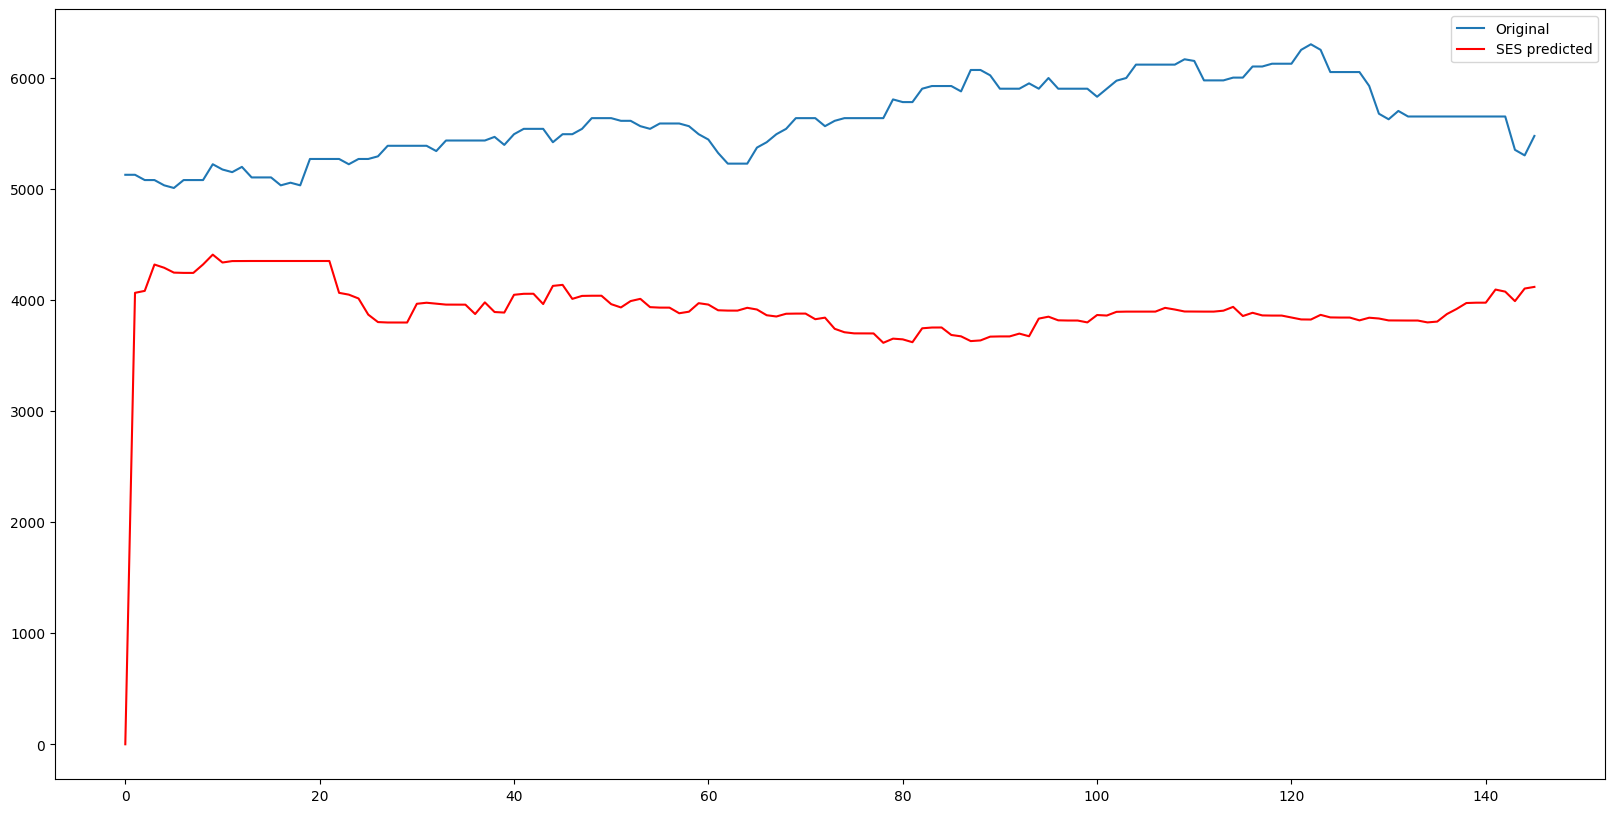

In [51]:
plt.plot(df_test.Beta.values, label='Original')
plt.plot(predictions.values, color='red', label='SES predicted')
plt.legend()

In [52]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.Beta.array, predictions.values)
mape = mean_absolute_percentage_error(df_test.Beta.array, predictions.values)
mse = mean_squared_error(df_test.Beta.array, predictions.values)
rmse = sqrt(mean_squared_error(df_test.Beta.array, predictions.values))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 1710.1826802104501
Mean Absolute Percentage Error 0.30097230705092914
mean_squared_error 3233573.199089741
root_mean_squared_error 1798.213891362688


Hasil menggunakan arima masih belum memenuhi harapan karena akurasinya masih jelek.

### Neural Prophet

In [53]:
!pip install neuralprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.2/812.2 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 21.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.wh

In [54]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


In [55]:
# Prophet needs some specifics data stuff, coment it here
prophet_training = df_training.rename(
    columns={'Beta': 'y'})  # old method
prophet_training['ds'] = prophet_training.index
prophet_training.index = pd.RangeIndex(len(prophet_training.index))

prophet_test = df_test.rename(columns={'Beta': 'y'})  # old method
prophet_test['ds'] = prophet_test.index
prophet_test.index = pd.RangeIndex(len(prophet_test.index))

In [56]:
data = prophet_training[['ds', 'y']]
data.columns = ['ds', 'y']
data.head()

ds         y
0 2022-04-18  4063.734
1 2022-04-19  4081.597
2 2022-04-20  4331.673
3 2022-04-21  4287.017
4 2022-04-22  4242.360

In [57]:
model = NeuralProphet()
model.fit(data, freq='D', epochs=100)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.829% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.829% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_s

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (19) is too small than the required number                     for the learning rate finder (220). The results might not be optimal.


Finding best initial lr:   0%|          | 0/220 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 32. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 10. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

train_loss  reg_loss          MAE         RMSE      Loss  RegLoss  epoch
0     1.193986       0.0  2694.841797  3020.533203  1.191103      0.0      0
1     1.022576       0.0  2305.245361  2618.957275  1.008918      0.0      1
2     0.846430       0.0  1948.428101  2238.048584  0.845144      0.0      2
3     0.649309       0.0  1521.418091  1793.094604  0.643034      0.0      3
4     0.439915       0.0  1079.752319  1309.101196  0.432152      0.0      4
..         ...       ...          ...          ...       ...      ...    ...
95    0.006515       0.0    98.907738   121.727936  0.006340      0.0     95
96    0.006511       0.0   101.174133   124.670654  0.006564      0.0     96
97    0.006504       0.0   100.231201   123.647217  0.006451      0.0     97
98    0.006507       0.0   101.783058   124.922630  0.006681      0.0     98
99    0.006507       0.0    99.328842   122.363808  0.006381      0.0     99

[100 rows x 7 columns]

In [58]:
future = model.make_future_dataframe(data, periods=146)
forecast = model.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.829% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.829% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.315% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.315% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.315% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.315% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


ds     y        yhat1        trend  season_weekly
0 2023-11-25  None  4854.169434  4855.342285      -1.172637
1 2023-11-26  None  4854.414062  4852.209961       2.204326
2 2023-11-27  None  4840.344727  4849.077148      -8.732710
3 2023-11-28  None  4842.301758  4845.944824      -3.642954
4 2023-11-29  None  4850.327148  4842.812500       7.514589

In [59]:
forecast.tail()

ds     y        yhat1        trend  season_weekly
141 2024-04-14  None  4415.871094  4413.666016       2.205181
142 2024-04-15  None  4401.794434  4410.533203      -8.738573
143 2024-04-16  None  4403.747070  4407.400879      -3.653948
144 2024-04-17  None  4411.779785  4404.268555       7.511236
145 2024-04-18  None  4398.983398  4401.136230      -2.152830

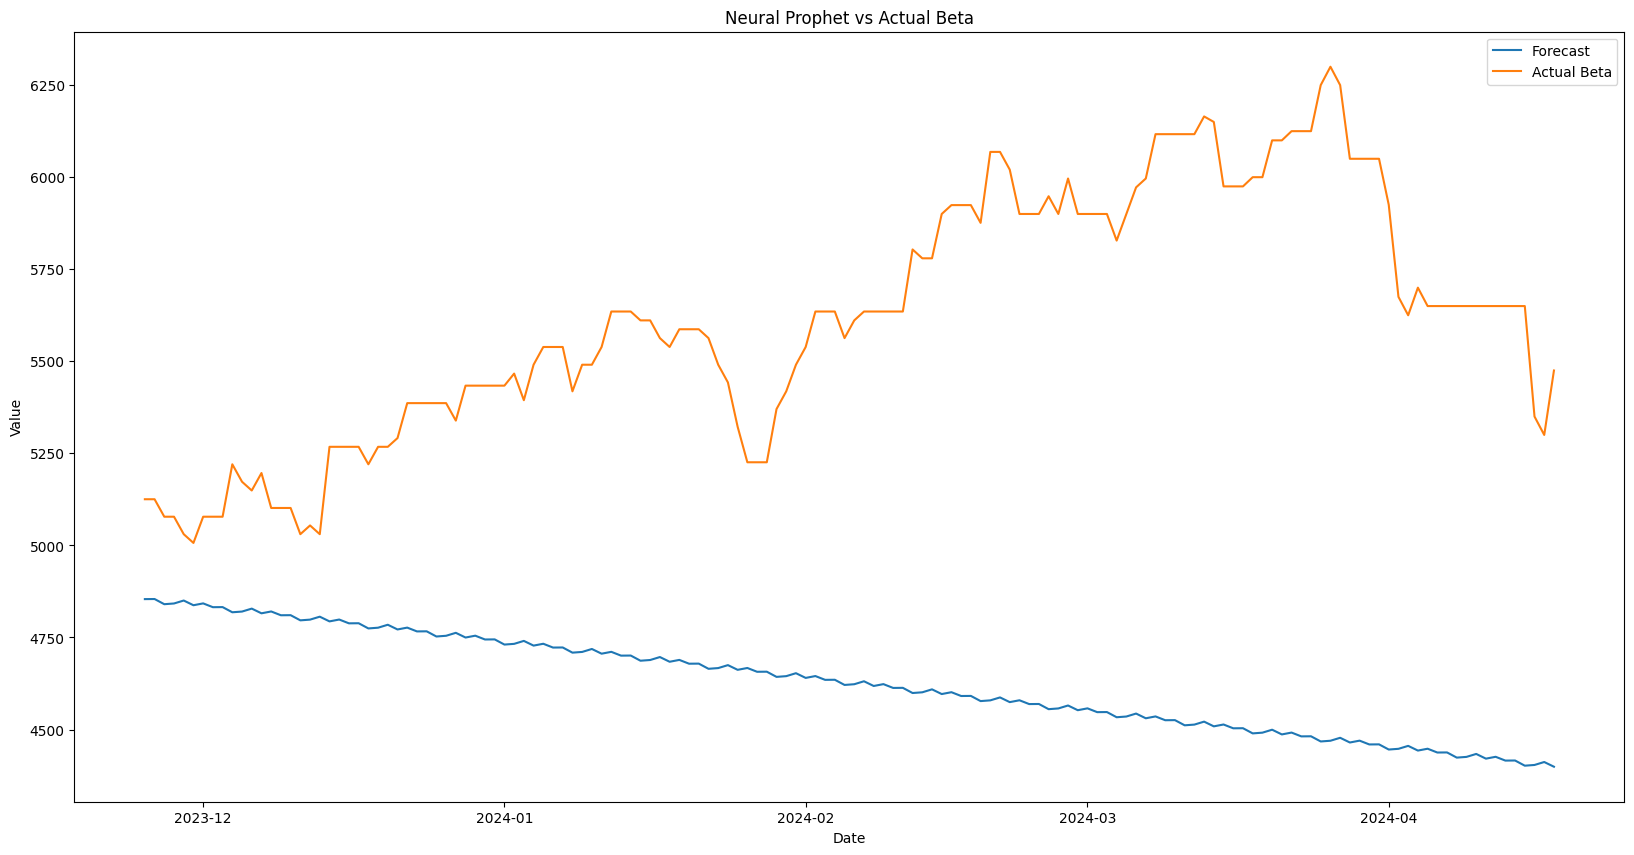

In [60]:
# Plot prediksi
plt.plot(forecast['ds'], forecast['yhat1'], label='Forecast')

# Plot data aktual dari df_test
plt.plot(df_test.index, df_test['Beta'], label='Actual Beta')

# Menambahkan judul dan label sumbu
plt.title('Neural Prophet vs Actual Beta')
plt.xlabel('Date')
plt.ylabel('Value')

# Menambahkan legenda untuk membedakan kedua garis
plt.legend()

# Menampilkan plot
plt.show()

In [61]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.Beta.array, forecast.yhat1)
mape = mean_absolute_percentage_error(df_test.Beta.array, forecast.yhat1)
mse = mean_squared_error(df_test.Beta.array, forecast.yhat1)
rmse = sqrt(mean_squared_error(df_test.Beta.array, forecast.yhat1))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 990.8015428082192
Mean Absolute Percentage Error 0.17235392084415255
mean_squared_error 1176612.3695712877
root_mean_squared_error 1084.71764509078


Menggunakan nerual prophet juga masih belum menyesuaikan dengan pola data

### Exponential Smoothing

In [62]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [63]:
model = ExponentialSmoothing(data.y, trend='add', seasonal='add', seasonal_periods=20)
fit = model.fit()

In [64]:
forecast = fit.forecast(steps=146)

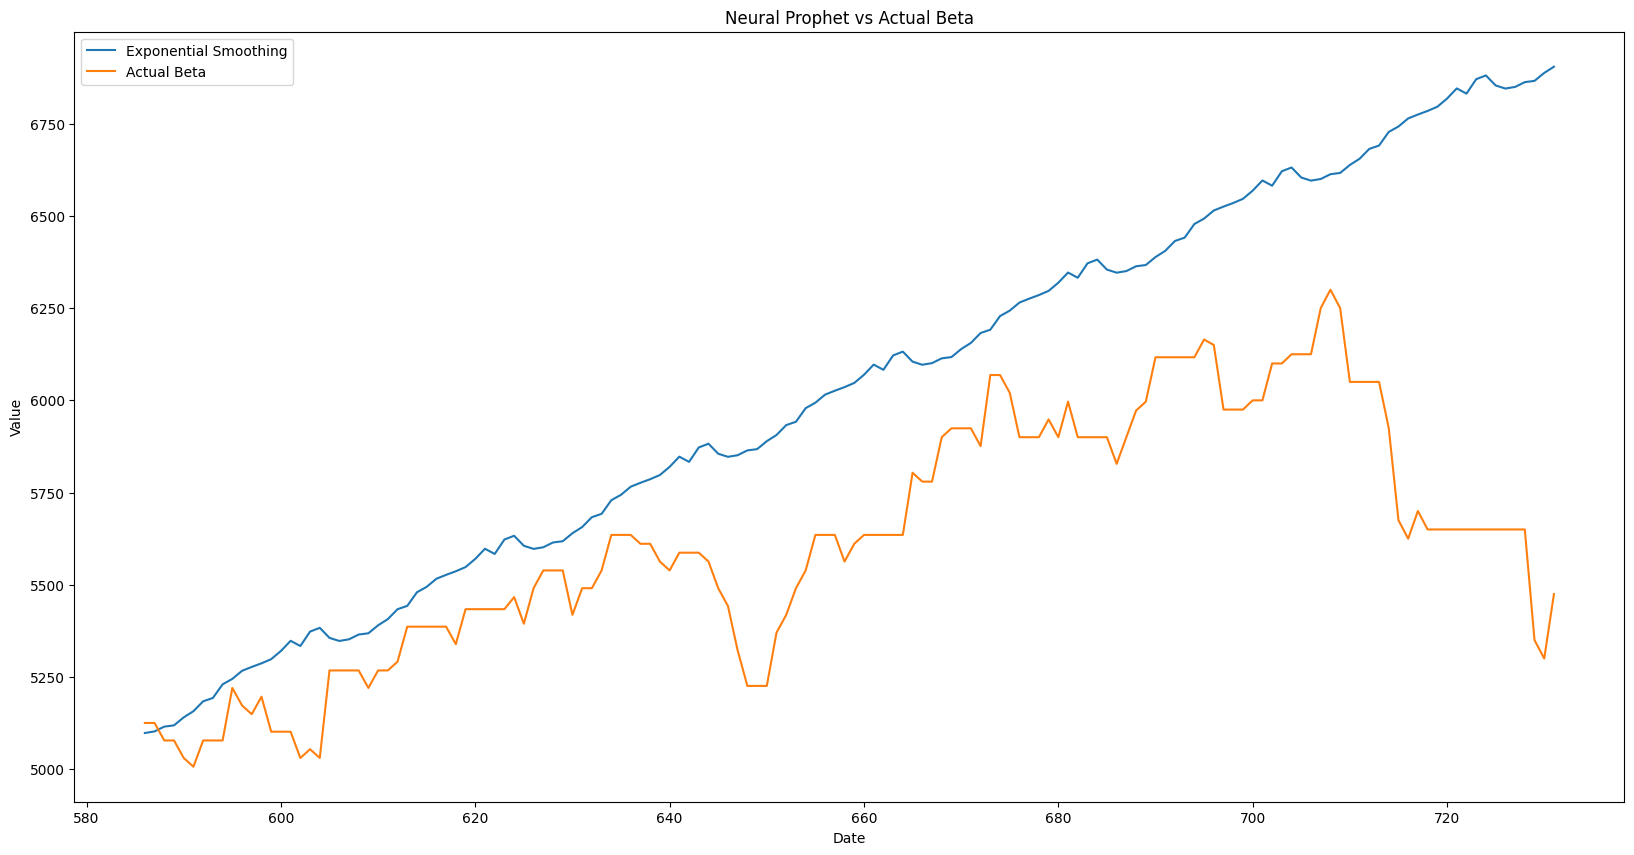

In [65]:
# Plot prediksi
plt.plot(forecast.index, forecast, label='Exponential Smoothing')

# Plot data aktual dari df_test
plt.plot(forecast.index, df_test['Beta'], label='Actual Beta')

# Menambahkan judul dan label sumbu
plt.title('Neural Prophet vs Actual Beta')
plt.xlabel('Date')
plt.ylabel('Value')

# Menambahkan legenda untuk membedakan kedua garis
plt.legend()

# Menampilkan plot
plt.show()

In [66]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.Beta.array, forecast.array)
mape = mean_absolute_percentage_error(df_test.Beta.array, forecast.array)
mse = mean_squared_error(df_test.Beta.array, forecast.array)
rmse = sqrt(mean_squared_error(df_test.Beta.array, forecast.array))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 408.08447795084726
Mean Absolute Percentage Error 0.07205925365770341
mean_squared_error 285175.98587613157
root_mean_squared_error 534.0187130392825


Exponential Smoothing belum memenuhi harapan untuk forecasting saham

## Set Holidays

importing data holidays yang sudah dusave saat awal, data ini digunakan untuk nanti saat modeling prophet

In [67]:
holiday = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT1gDKWJFQ87o_gRGvYKhmtEh2o8GiBQzEd_b66z65fBnYVX_MJUhfu-xq3ws7ljcWzbAzuNFzjxosQ/pub?gid=1685982982&single=true&output=csv"

In [68]:
holidays = pd.read_csv(holiday)

## Beta

In [69]:
# Prophet needs some specifics data stuff, coment it here
prophet_training = df_training.rename(
    columns={'Beta': 'y'})  # old method
prophet_training['ds'] = prophet_training.index
prophet_training.index = pd.RangeIndex(len(prophet_training.index))

prophet_test = df_test.rename(columns={'Beta': 'y'})  # old method
prophet_test['ds'] = prophet_test.index
prophet_test.index = pd.RangeIndex(len(prophet_test.index))

In [70]:
prophet = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays=holidays,
    holidays_prior_scale=0.01,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=15
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=30
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=60
)

In [71]:
train = prophet
train.fit(prophet_training)
yhat = train.predict(prophet_test)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/9xyn_wo5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/9_h56ulc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92966', 'data', 'file=/tmp/tmpet62vpyo/9xyn_wo5.json', 'init=/tmp/tmpet62vpyo/9_h56ulc.json', 'output', 'file=/tmp/tmpet62vpyo/prophet_modeld90r_tiz/prophet_model-20240622025101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:51:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:51:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [72]:
yhat['is_holiday'] = yhat['ds'].isin(holidays['ds'])

# Loop through yhat and adjust values to ensure no change during holidays
for i in range(1, len(yhat)):
    if yhat.loc[i, 'is_holiday']:
        yhat.loc[i, 'yhat'] = yhat.loc[i-1, 'yhat']

# Drop the 'is_holiday' column as it's no longer needed
yhat.drop(columns=['is_holiday'], inplace=True)

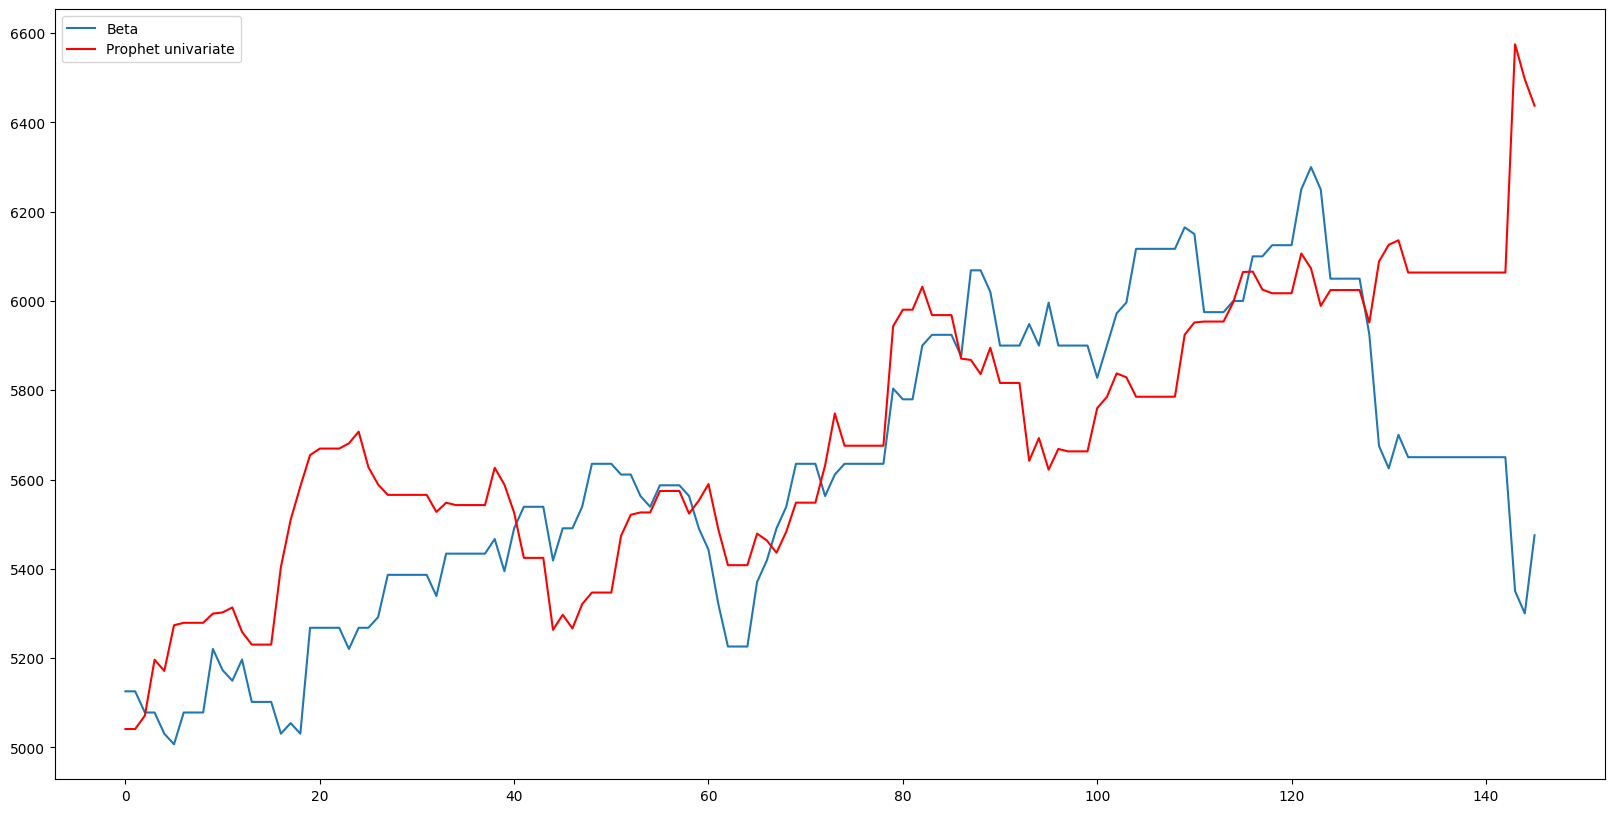

In [73]:
plt.figure(figsize=(20, 10))
plt.plot(df_test.Beta.values, label='Beta')
plt.plot(yhat.yhat, color='red', label='Prophet univariate')
plt.legend()
plt.show()

In [74]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.Beta.array, yhat.yhat.array)
mape = mean_absolute_percentage_error(df_test.Beta.array, yhat.yhat.array)
mse = mean_squared_error(df_test.Beta.array, yhat.yhat.array)
rmse = sqrt(mean_squared_error(df_test.Beta.array, yhat.yhat.array))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 202.26813779681095
Mean Absolute Percentage Error 0.036471786153918044
mean_squared_error 77336.89035004334
root_mean_squared_error 278.0951102591402


## Gamma

In [75]:
# Prophet needs some specifics data stuff, coment it here
prophet_training1 = df_training.rename(
    columns={'Gamma': 'y'})  # old method
prophet_training1['ds'] = prophet_training1.index
prophet_training1.index = pd.RangeIndex(len(prophet_training1.index))

prophet_test1 = df_test.rename(columns={'Gamma': 'y'})  # old method
prophet_test1['ds'] = prophet_test1.index
prophet_test1.index = pd.RangeIndex(len(prophet_test1.index))

In [76]:
prophet1 = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays=holidays,
    holidays_prior_scale=0.01,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=5
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=30
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=60
)

In [77]:
prophet1.fit(prophet_training1)
yhat1 = prophet1.predict(prophet_test1)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/q_hyldff.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/d4i0mhw3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36243', 'data', 'file=/tmp/tmpet62vpyo/q_hyldff.json', 'init=/tmp/tmpet62vpyo/d4i0mhw3.json', 'output', 'file=/tmp/tmpet62vpyo/prophet_modelijadvgpp/prophet_model-20240622025107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:51:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:51:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [78]:
yhat1['is_holiday'] = yhat1['ds'].isin(holidays['ds'])

# Loop through yhat1 and adjust values to ensure no change during holidays
for i in range(1, len(yhat1)):
    if yhat1.loc[i, 'is_holiday']:
        yhat1.loc[i, 'yhat'] = yhat1.loc[i-1, 'yhat']

# Drop the 'is_holiday' column as it's no longer needed
yhat1.drop(columns=['is_holiday'], inplace=True)

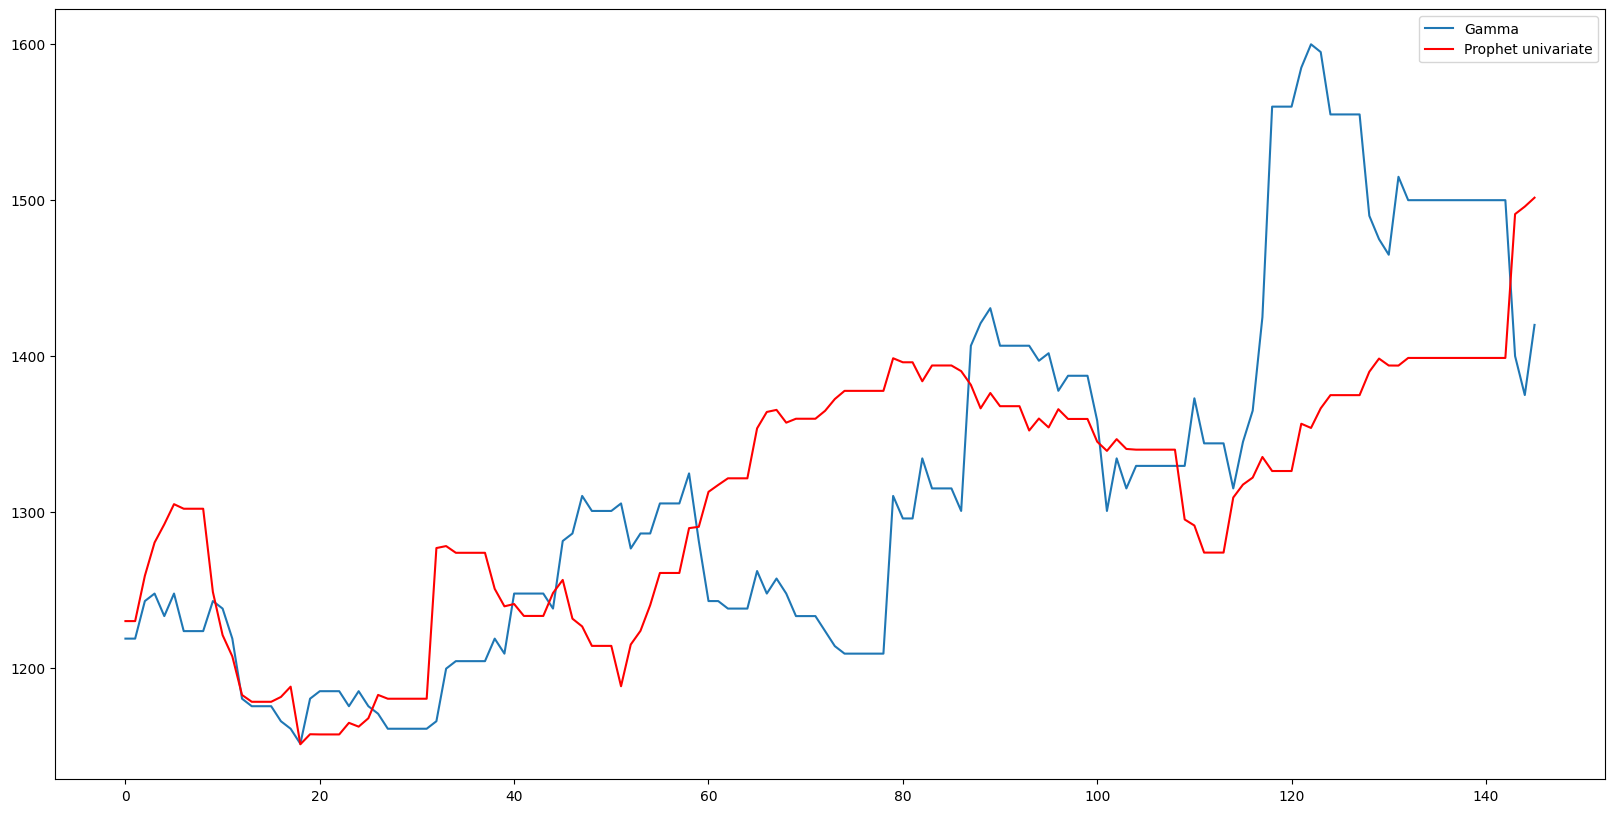

In [79]:
plt.plot(df_test.Gamma.values, label='Gamma')
plt.plot(yhat1.yhat, color='red', label='Prophet univariate')
plt.legend()

In [80]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.Gamma.array, yhat1.yhat.array)
mape1 = mean_absolute_percentage_error(df_test.Gamma.array, yhat1.yhat.array)
mse = mean_squared_error(df_test.Gamma.array, yhat1.yhat.array)
rmse = sqrt(mean_squared_error(df_test.Gamma.array, yhat1.yhat.array))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape1)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 70.34634625898268
Mean Absolute Percentage Error 0.052016600748150205
mean_squared_error 8221.102275968407
root_mean_squared_error 90.6702943414678


## Epsilon

In [81]:
# Prophet needs some specifics data stuff, coment it here
prophet_training2 = df_training.rename(
    columns={'Epsilon': 'y'})  # old method
prophet_training2['ds'] = prophet_training2.index
prophet_training2.index = pd.RangeIndex(len(prophet_training2.index))

prophet_test2 = df_test.rename(columns={'Epsilon': 'y'})  # old method
prophet_test2['ds'] = prophet_test2.index
prophet_test2.index = pd.RangeIndex(len(prophet_test2.index))

In [82]:
prophet2 = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays=holidays,
    holidays_prior_scale=0.01,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=10
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=15
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=30
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=50
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=50
)

In [83]:
prophet2.fit(prophet_training2)
yhat2 = prophet2.predict(prophet_test2)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/wc785hd0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/5regxl6t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32998', 'data', 'file=/tmp/tmpet62vpyo/wc785hd0.json', 'init=/tmp/tmpet62vpyo/5regxl6t.json', 'output', 'file=/tmp/tmpet62vpyo/prophet_modelj8r988fg/prophet_model-20240622025112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:51:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:51:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [84]:
yhat2['is_holiday'] = yhat2['ds'].isin(holidays['ds'])

for i in range(1, len(yhat2)):
    if yhat2.loc[i, 'is_holiday']:
        yhat2.loc[i, 'yhat'] = yhat2.loc[i-1, 'yhat']

yhat2.drop(columns=['is_holiday'], inplace=True)

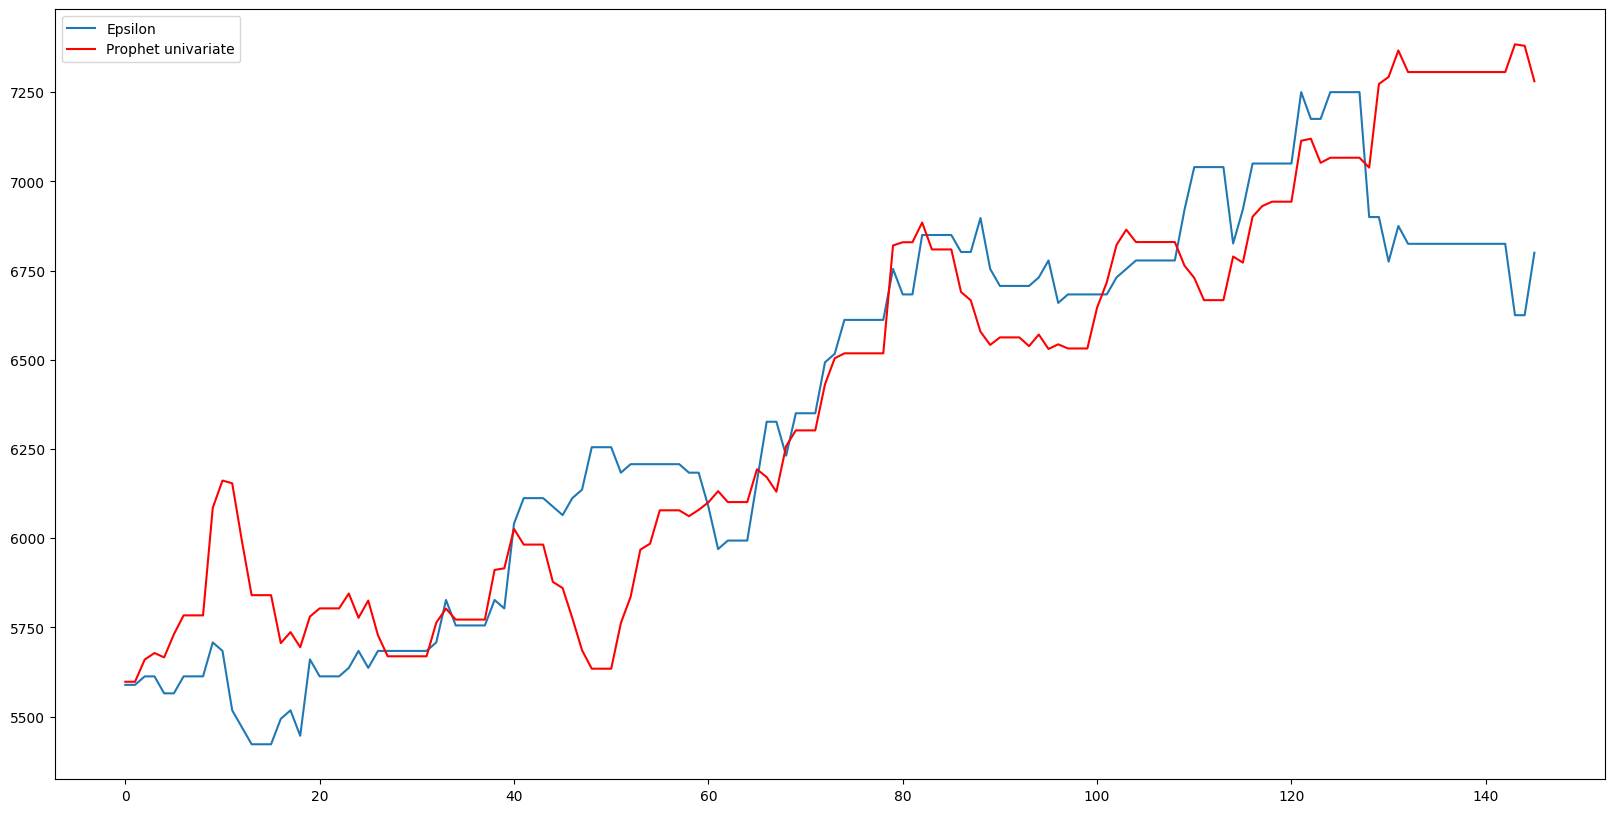

In [85]:
plt.plot(df_test.Epsilon.values, label='Epsilon')
plt.plot(yhat2.yhat, color='red', label='Prophet univariate')
plt.legend()

In [86]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.Epsilon.array, yhat2.yhat.array)
mape2 = mean_absolute_percentage_error(df_test.Epsilon.array, yhat2.yhat.array)
mse = mean_squared_error(df_test.Epsilon.array, yhat2.yhat.array)
rmse = sqrt(mean_squared_error(df_test.Epsilon.array, yhat2.yhat.array))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape2)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 199.00052478287793
Mean Absolute Percentage Error 0.03127400530441034
mean_squared_error 70598.44621708481
root_mean_squared_error 265.7036812260696


## Alpha

In [87]:
# Prophet needs some specifics data stuff, coment it here
prophet_training3 = df_training.rename(
    columns={'Alpha': 'y'})  # old method
prophet_training3['ds'] = prophet_training3.index
prophet_training3.index = pd.RangeIndex(len(prophet_training3.index))

prophet_test3 = df_test.rename(columns={'Alpha': 'y'})  # old method
prophet_test3['ds'] = prophet_test3.index
prophet_test3.index = pd.RangeIndex(len(prophet_test3.index))

In [88]:
prophet3 = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays=holidays,
    holidays_prior_scale=0.01,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=5
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=30
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=60
)

In [89]:
prophet3.fit(prophet_training3)
yhat3 = prophet3.predict(prophet_test3)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/x63uvf78.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/1pn6b19x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68216', 'data', 'file=/tmp/tmpet62vpyo/x63uvf78.json', 'init=/tmp/tmpet62vpyo/1pn6b19x.json', 'output', 'file=/tmp/tmpet62vpyo/prophet_modelvv_ftgi0/prophet_model-20240622025118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:51:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:51:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [90]:
yhat3['is_holiday'] = yhat3['ds'].isin(holidays['ds'])

for i in range(1, len(yhat3)):
    if yhat3.loc[i, 'is_holiday']:
        yhat3.loc[i, 'yhat'] = yhat3.loc[i-1, 'yhat']

yhat3.drop(columns=['is_holiday'], inplace=True)

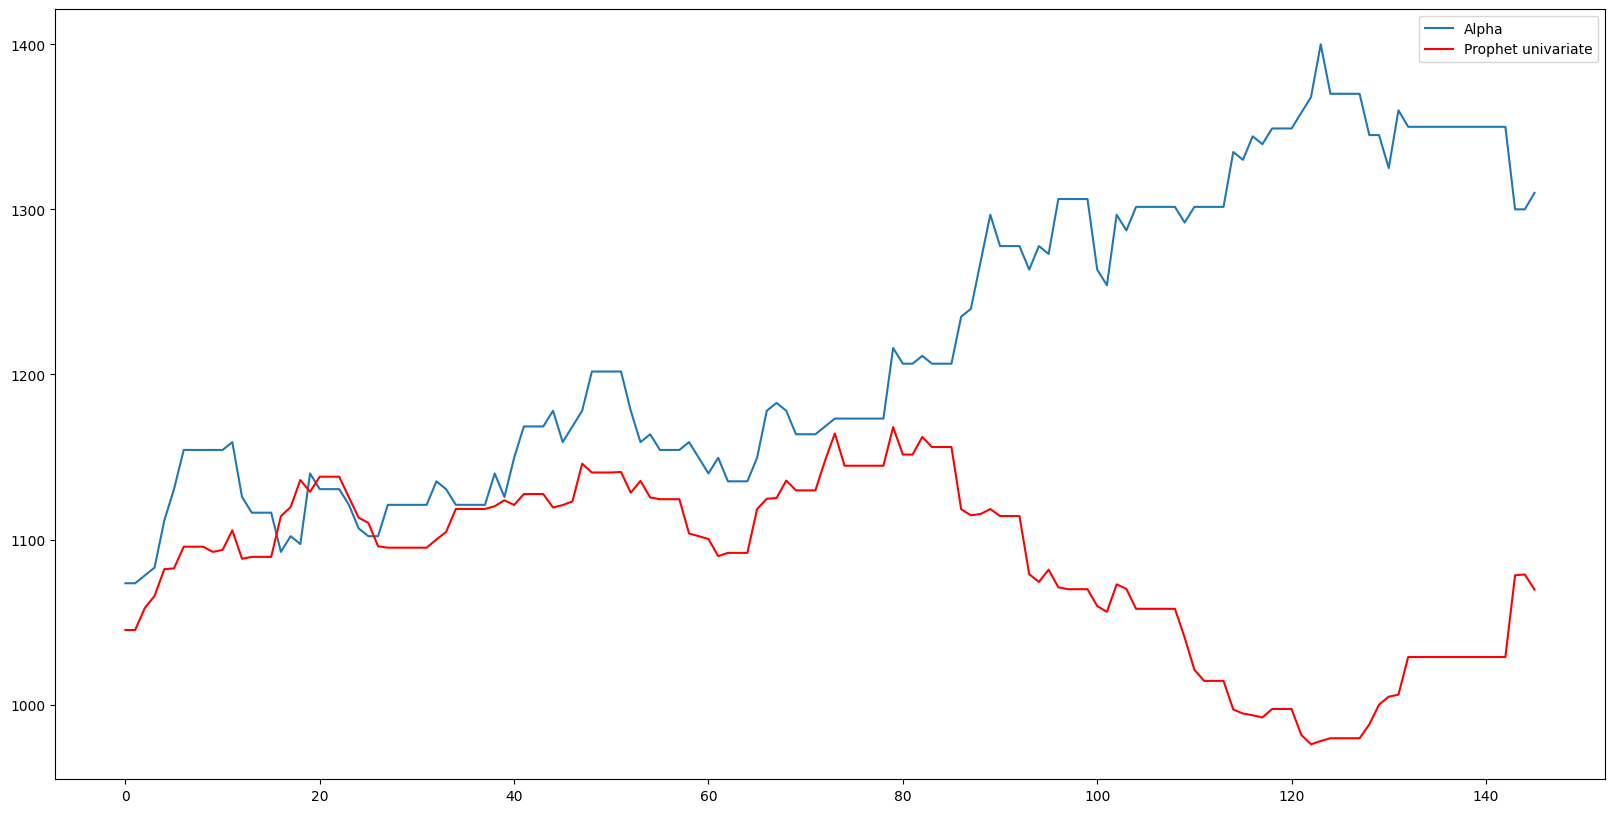

In [91]:
plt.plot(df_test.Alpha.values, label='Alpha')
plt.plot(yhat3.yhat, color='red', label='Prophet univariate')
plt.legend()

In [92]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.Alpha.array, yhat3.yhat.array)
mape3 = mean_absolute_percentage_error(df_test.Alpha.array, yhat3.yhat.array)
mse = mean_squared_error(df_test.Alpha.array, yhat3.yhat.array)
rmse = sqrt(mean_squared_error(df_test.Alpha.array, yhat3.yhat.array))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape3)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 135.1507164338617
Mean Absolute Percentage Error 0.10398520406339926
mean_squared_error 35467.46180383099
root_mean_squared_error 188.32806961212924


## Iota

In [93]:
# Prophet needs some specifics data stuff, coment it here
prophet_training4 = df_training.rename(
    columns={'Iota': 'y'})  # old method
prophet_training4['ds'] = prophet_training4.index
prophet_training4.index = pd.RangeIndex(len(prophet_training4.index))

prophet_test4 = df_test.rename(columns={'Iota': 'y'})  # old method
prophet_test4['ds'] = prophet_test4.index
prophet_test4.index = pd.RangeIndex(len(prophet_test4.index))

In [94]:
prophet4 = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays=holidays,
    holidays_prior_scale=0.01,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=10
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=40
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=40
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=50
)

In [95]:
prophet4.fit(prophet_training4)
yhat4 = prophet4.predict(prophet_test4)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/brps1kr7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/hcu3651b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68830', 'data', 'file=/tmp/tmpet62vpyo/brps1kr7.json', 'init=/tmp/tmpet62vpyo/hcu3651b.json', 'output', 'file=/tmp/tmpet62vpyo/prophet_modelew361p68/prophet_model-20240622025124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:51:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:51:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [96]:
yhat4['is_holiday'] = yhat4['ds'].isin(holidays['ds'])

for i in range(1, len(yhat4)):
    if yhat4.loc[i, 'is_holiday']:
        yhat4.loc[i, 'yhat'] = yhat4.loc[i-1, 'yhat']

yhat4.drop(columns=['is_holiday'], inplace=True)

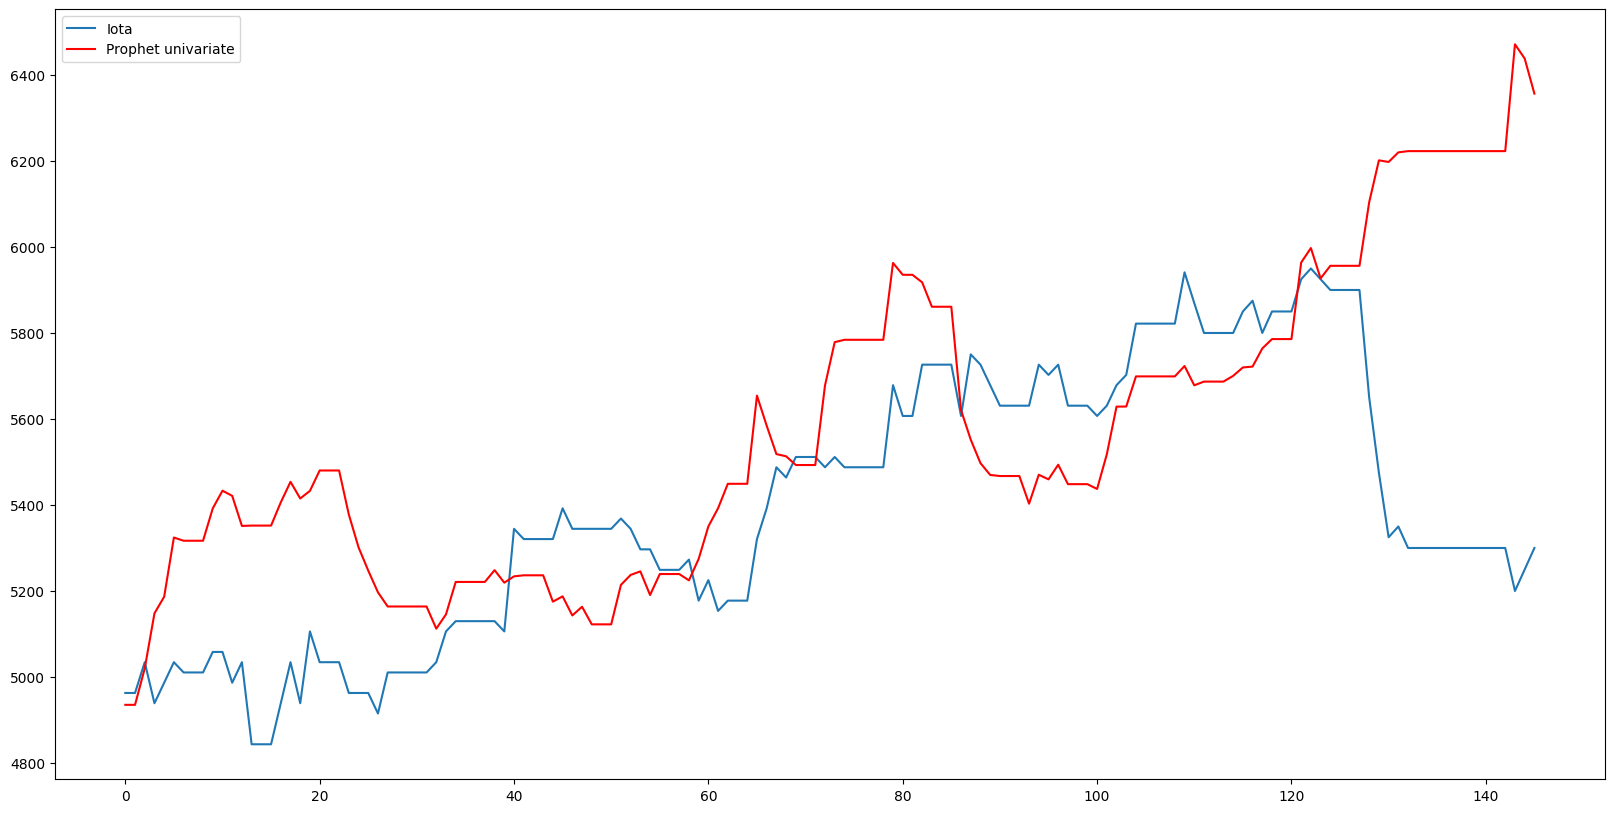

In [97]:
plt.plot(df_test.Iota.values, label='Iota')
plt.plot(yhat4.yhat, color='red', label='Prophet univariate')
plt.legend()

In [98]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.Iota.array, yhat4.yhat.array)
mape4 = mean_absolute_percentage_error(df_test.Iota.array, yhat4.yhat.array)
mse = mean_squared_error(df_test.Iota.array, yhat4.yhat.array)
rmse = sqrt(mean_squared_error(df_test.Iota.array, yhat4.yhat.array))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape4)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 274.69873007052774
Mean Absolute Percentage Error 0.05189898209934511
mean_squared_error 151545.82228667027
root_mean_squared_error 389.2888674065446


## Theta

In [99]:
# Prophet needs some specifics data stuff, coment it here
prophet_training5 = df_training.rename(
    columns={'Theta': 'y'})  # old method
prophet_training5['ds'] = prophet_training5.index
prophet_training5.index = pd.RangeIndex(len(prophet_training5.index))

prophet_test5 = df_test.rename(columns={'Theta': 'y'})  # old method
prophet_test5['ds'] = prophet_test5.index
prophet_test5.index = pd.RangeIndex(len(prophet_test5.index))

In [100]:
prophet5 = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays=holidays,
    holidays_prior_scale=0.01,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=5
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=30
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=50
)

In [101]:
prophet5.fit(prophet_training5)
yhat5 = prophet5.predict(prophet_test5)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/ku8tlwiy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/7mo6cfk9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92098', 'data', 'file=/tmp/tmpet62vpyo/ku8tlwiy.json', 'init=/tmp/tmpet62vpyo/7mo6cfk9.json', 'output', 'file=/tmp/tmpet62vpyo/prophet_model9_yse8rt/prophet_model-20240622025129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:51:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:51:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [102]:
yhat5['is_holiday'] = yhat5['ds'].isin(holidays['ds'])

for i in range(1, len(yhat5)):
    if yhat5.loc[i, 'is_holiday']:
        yhat5.loc[i, 'yhat'] = yhat5.loc[i-1, 'yhat']

yhat5.drop(columns=['is_holiday'], inplace=True)

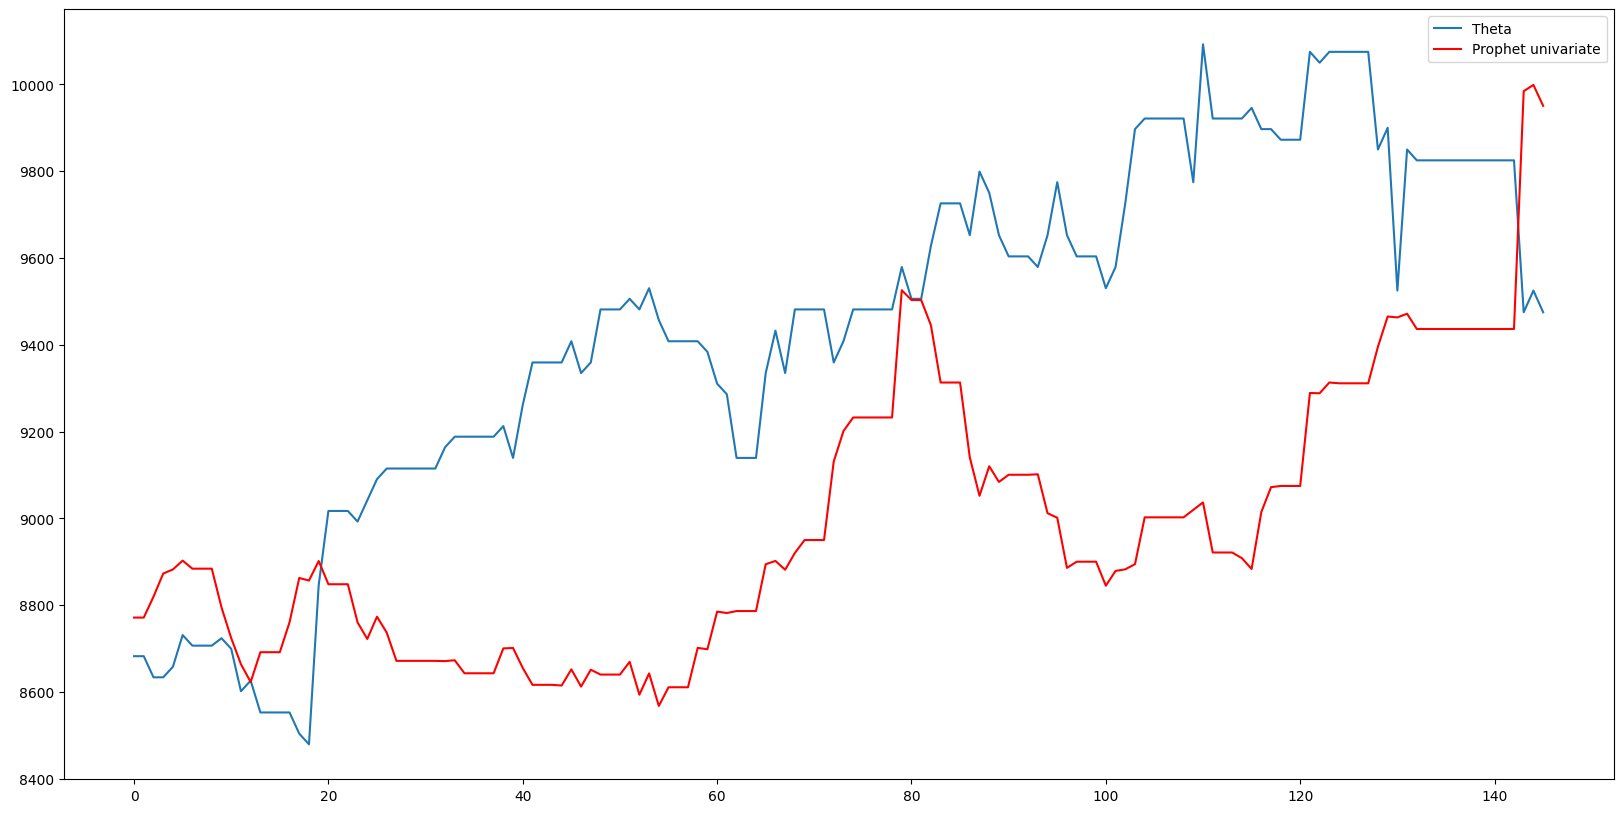

In [103]:
plt.plot(df_test.Theta.values, label='Theta')
plt.plot(yhat5.yhat, color='red', label='Prophet univariate')
plt.legend()

In [104]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.Theta.array, yhat5.yhat.array)
mape5 = mean_absolute_percentage_error(df_test.Theta.array, yhat5.yhat.array)
mse = mean_squared_error(df_test.Theta.array, yhat5.yhat.array)
rmse = sqrt(mean_squared_error(df_test.Theta.array, yhat5.yhat.array))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape5)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 517.736640799816
Mean Absolute Percentage Error 0.054129024128990046
mean_squared_error 342158.32729303226
root_mean_squared_error 584.943012004616


## Kappa

In [105]:
# Prophet needs some specifics data stuff, coment it here
prophet_training6 = df_training.rename(
    columns={'Kappa': 'y'})  # old method
prophet_training6['ds'] = prophet_training6.index
prophet_training6.index = pd.RangeIndex(len(prophet_training6.index))

prophet_test6 = df_test.rename(columns={'Kappa': 'y'})  # old method
prophet_test6['ds'] = prophet_test6.index
prophet_test6.index = pd.RangeIndex(len(prophet_test6.index))

In [106]:
prophet6 = Prophet(
    growth='linear',
    seasonality_mode='additive',
    holidays=holidays,
    holidays_prior_scale=0.01,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=5
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=30
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=50
)

In [107]:
prophet6.fit(prophet_training6)
yhat6 = prophet6.predict(prophet_test6)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/grvemm5k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/h153ftxp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19138', 'data', 'file=/tmp/tmpet62vpyo/grvemm5k.json', 'init=/tmp/tmpet62vpyo/h153ftxp.json', 'output', 'file=/tmp/tmpet62vpyo/prophet_model8g2qlzyj/prophet_model-20240622025135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:51:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:51:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [108]:
yhat6['is_holiday'] = yhat6['ds'].isin(holidays['ds'])

for i in range(1, len(yhat6)):
    if yhat6.loc[i, 'is_holiday']:
        yhat6.loc[i, 'yhat'] = yhat6.loc[i-1, 'yhat']

yhat6.drop(columns=['is_holiday'], inplace=True)

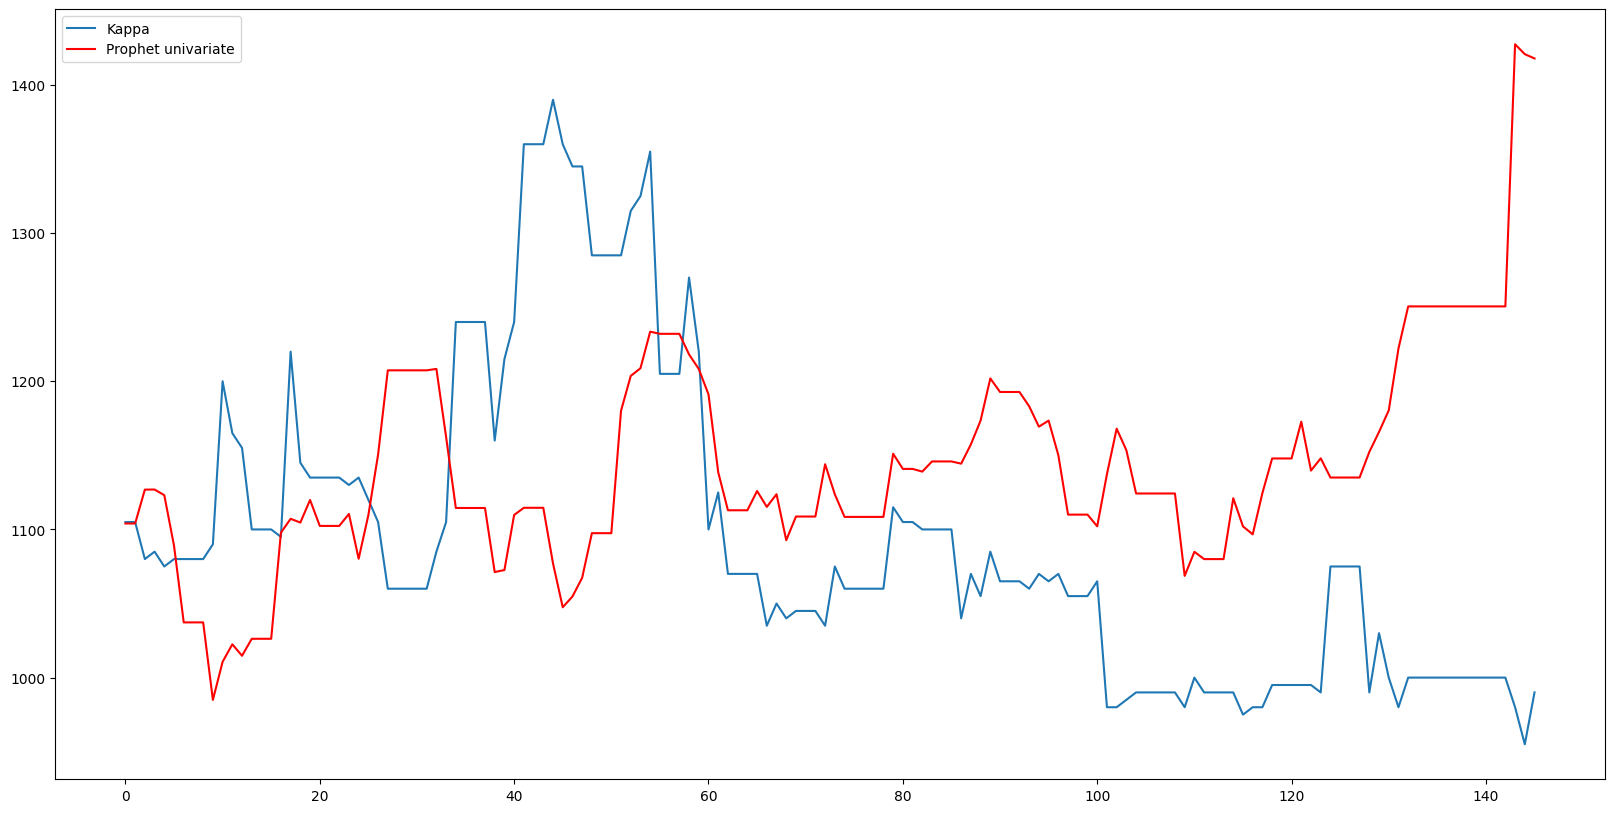

In [109]:
plt.plot(df_test.Kappa.values, label='Kappa')
plt.plot(yhat6.yhat, color='red', label='Prophet univariate')
plt.legend()

In [110]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.Kappa.array, yhat6.yhat.array)
mape6 = mean_absolute_percentage_error(df_test.Kappa.array, yhat6.yhat.array)
mse = mean_squared_error(df_test.Kappa.array, yhat6.yhat.array)
rmse = sqrt(mean_squared_error(df_test.Kappa.array, yhat6.yhat.array))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape6)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 118.39753994427387
Mean Absolute Percentage Error 0.1096601562724058
mean_squared_error 21770.20865936485
root_mean_squared_error 147.54730990216274


## Mu

In [111]:
# Prophet needs some specifics data stuff, coment it here
prophet_training7 = df_training.rename(
    columns={'Mu': 'y'})  # old method
prophet_training7['ds'] = prophet_training7.index
prophet_training7.index = pd.RangeIndex(len(prophet_training7.index))

prophet_test7 = df_test.rename(columns={'Mu': 'y'})  # old method
prophet_test7['ds'] = prophet_test7.index
prophet_test7.index = pd.RangeIndex(len(prophet_test7.index))

In [112]:
prophet7 = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays=holidays,
    holidays_prior_scale=0.01,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=10
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=20
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=40
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=50
)

In [113]:
prophet7.fit(prophet_training7)
yhat7 = prophet7.predict(prophet_test7)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/75stv9jc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/brunbvz0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76959', 'data', 'file=/tmp/tmpet62vpyo/75stv9jc.json', 'init=/tmp/tmpet62vpyo/brunbvz0.json', 'output', 'file=/tmp/tmpet62vpyo/prophet_modeldnzzz82r/prophet_model-20240622025137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:51:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:51:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [114]:
yhat7['is_holiday'] = yhat7['ds'].isin(holidays['ds'])

for i in range(1, len(yhat7)):
    if yhat7.loc[i, 'is_holiday']:
        yhat7.loc[i, 'yhat'] = yhat7.loc[i-1, 'yhat']

yhat7.drop(columns=['is_holiday'], inplace=True)

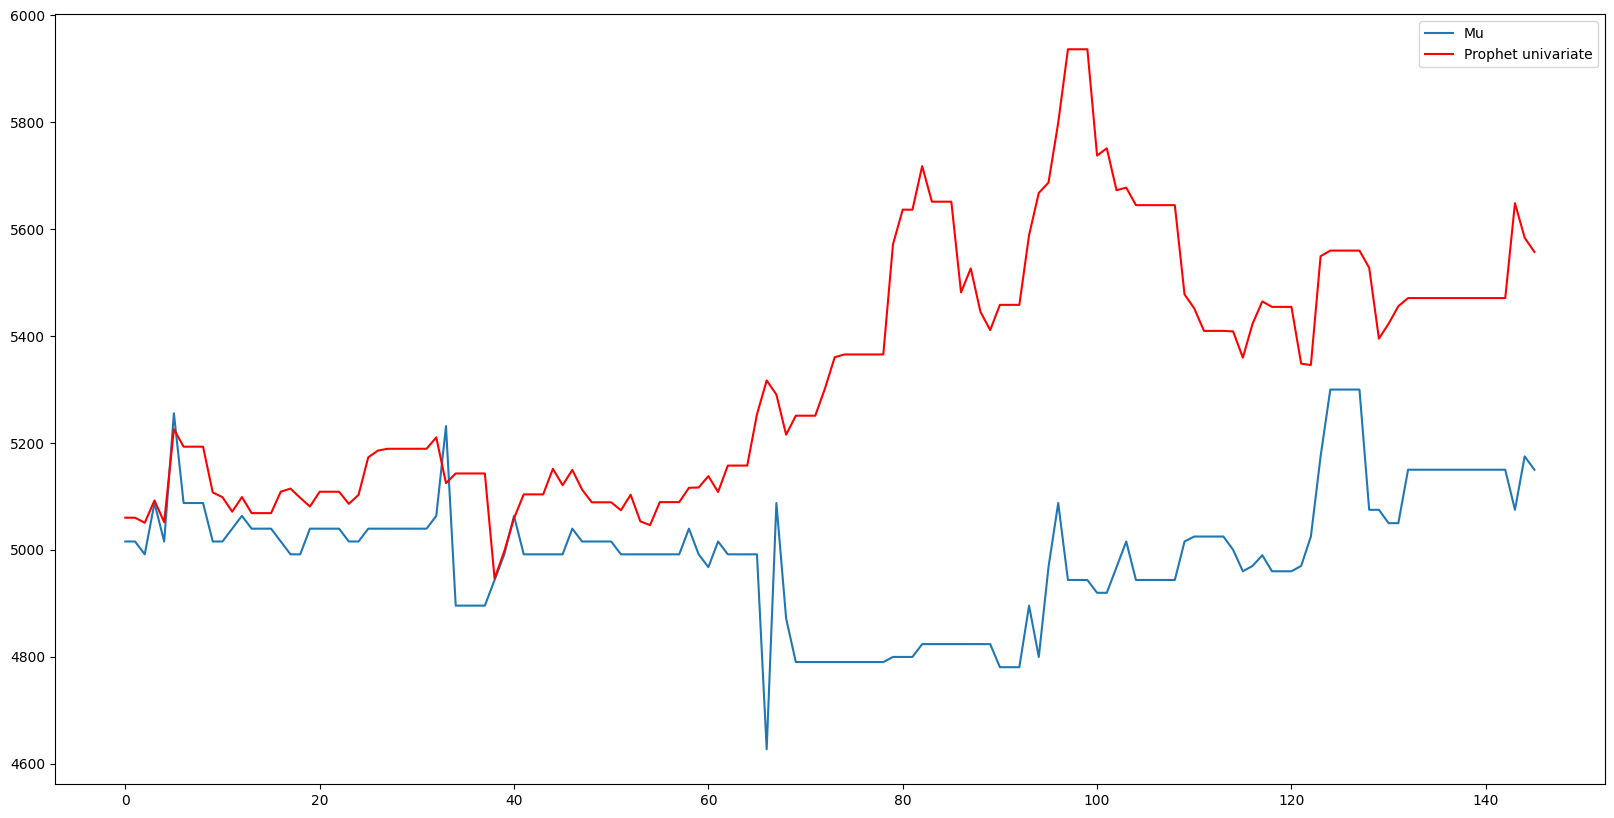

In [115]:
plt.plot(df_test.Mu.values, label='Mu')
plt.plot(yhat7.yhat, color='red', label='Prophet univariate')
plt.legend()

In [116]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.Mu.array, yhat7.yhat.array)
mape7 = mean_absolute_percentage_error(df_test.Mu.array, yhat7.yhat.array)
mse = mean_squared_error(df_test.Mu.array, yhat7.yhat.array)
rmse = sqrt(mean_squared_error(df_test.Mu.array, yhat7.yhat.array))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape7)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 343.23226725382267
Mean Absolute Percentage Error 0.06951501313106231
mean_squared_error 189831.93447066654
root_mean_squared_error 435.697067319332


## Eta

In [117]:
# Prophet needs some specifics data stuff, coment it here
prophet_training8 = df_training.rename(
    columns={'Eta': 'y'})  # old method
prophet_training8['ds'] = prophet_training8.index
prophet_training8.index = pd.RangeIndex(len(prophet_training8.index))

prophet_test8 = df_test.rename(columns={'Eta': 'y'})  # old method
prophet_test8['ds'] = prophet_test8.index
prophet_test8.index = pd.RangeIndex(len(prophet_test8.index))

In [118]:
prophet8 = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays=holidays,
    holidays_prior_scale=0.01,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=15
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=30
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=50
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=50
)

In [119]:
prophet8.fit(prophet_training8)
yhat8 = prophet8.predict(prophet_test8)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/c7a4viw6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/ra62w9oh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47544', 'data', 'file=/tmp/tmpet62vpyo/c7a4viw6.json', 'init=/tmp/tmpet62vpyo/ra62w9oh.json', 'output', 'file=/tmp/tmpet62vpyo/prophet_modellby5x9th/prophet_model-20240622025142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:51:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:51:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [120]:
yhat8['is_holiday'] = yhat8['ds'].isin(holidays['ds'])

for i in range(1, len(yhat8)):
    if yhat8.loc[i, 'is_holiday']:
        yhat8.loc[i, 'yhat'] = yhat8.loc[i-1, 'yhat']

yhat8.drop(columns=['is_holiday'], inplace=True)

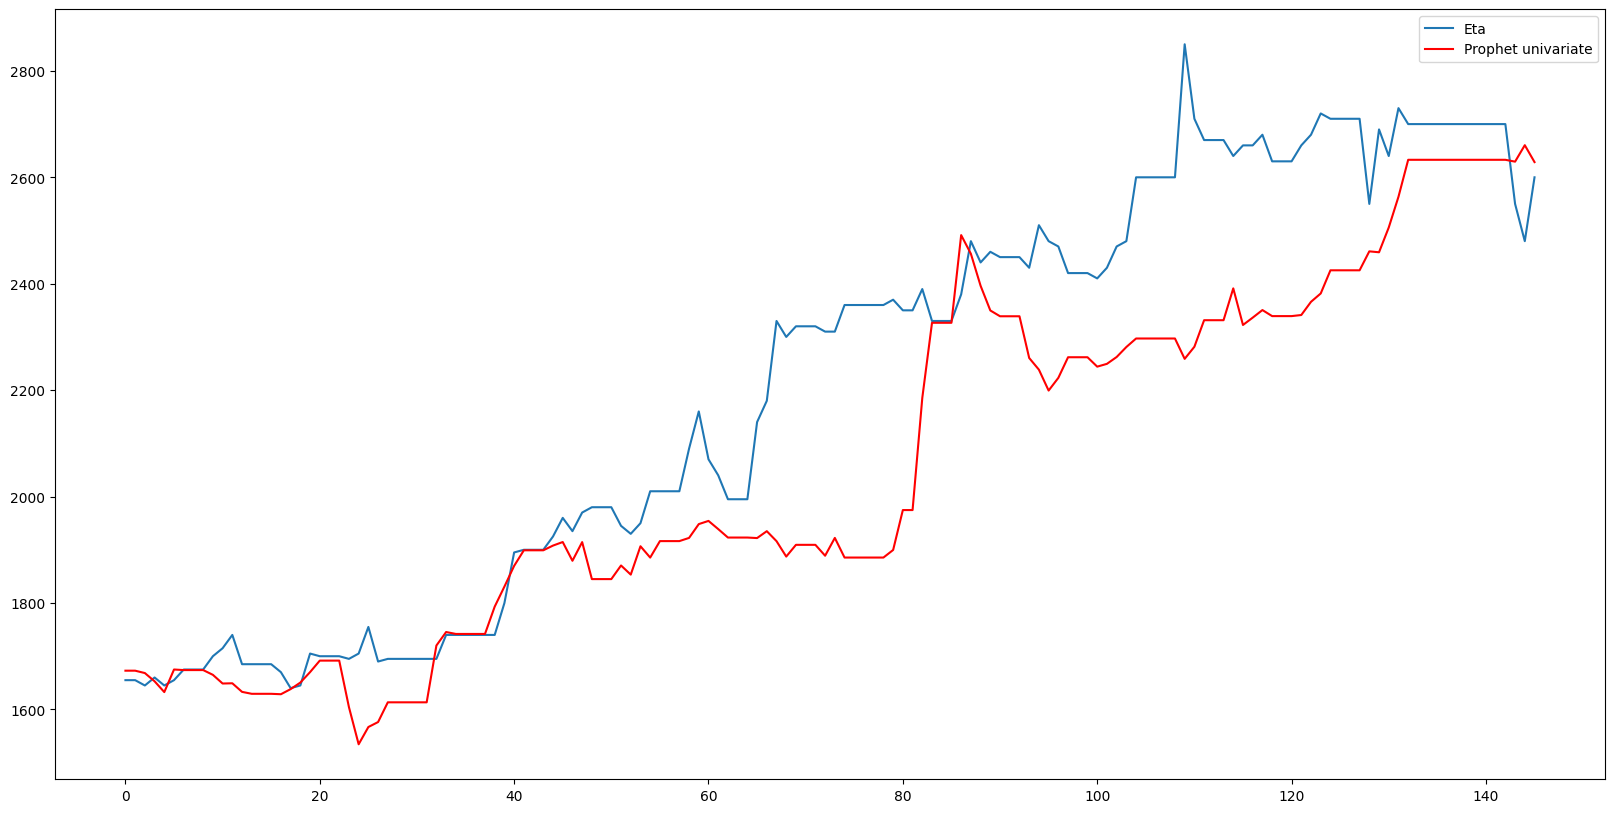

In [121]:
plt.plot(df_test.Eta.values, label='Eta')
plt.plot(yhat8.yhat, color='red', label='Prophet univariate')
plt.legend()

In [122]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.Eta.array, yhat8.yhat.array)
mape8 = mean_absolute_percentage_error(df_test.Eta.array, yhat8.yhat.array)
mse = mean_squared_error(df_test.Eta.array, yhat8.yhat.array)
rmse = sqrt(mean_squared_error(df_test.Eta.array, yhat8.yhat.array))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape8)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 158.29168027004792
Mean Absolute Percentage Error 0.06679785936788261
mean_squared_error 45733.03419160788
root_mean_squared_error 213.85283302216945


## Lambda

In [123]:
# Prophet needs some specifics data stuff, coment it here
prophet_training9 = df_training.rename(
    columns={'Lambda': 'y'})  # old method
prophet_training9['ds'] = prophet_training9.index
prophet_training9.index = pd.RangeIndex(len(prophet_training9.index))

prophet_test9 = df_test.rename(columns={'Lambda': 'y'})  # old method
prophet_test9['ds'] = prophet_test9.index
prophet_test9.index = pd.RangeIndex(len(prophet_test9.index))

In [124]:
prophet9 = Prophet(
    growth='linear',
    seasonality_mode='additive',
    holidays=holidays,
    holidays_prior_scale=0.01,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=15
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=30
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=50
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=60
)

In [125]:
prophet9.fit(prophet_training9)
yhat9 = prophet9.predict(prophet_test9)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/t1ktiawf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/25gdukl7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79923', 'data', 'file=/tmp/tmpet62vpyo/t1ktiawf.json', 'init=/tmp/tmpet62vpyo/25gdukl7.json', 'output', 'file=/tmp/tmpet62vpyo/prophet_modelpo3gee6y/prophet_model-20240622025148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:51:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:51:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [126]:
yhat9['is_holiday'] = yhat9['ds'].isin(holidays['ds'])

for i in range(1, len(yhat9)):
    if yhat9.loc[i, 'is_holiday']:
        yhat9.loc[i, 'yhat'] = yhat9.loc[i-1, 'yhat']

yhat9.drop(columns=['is_holiday'], inplace=True)

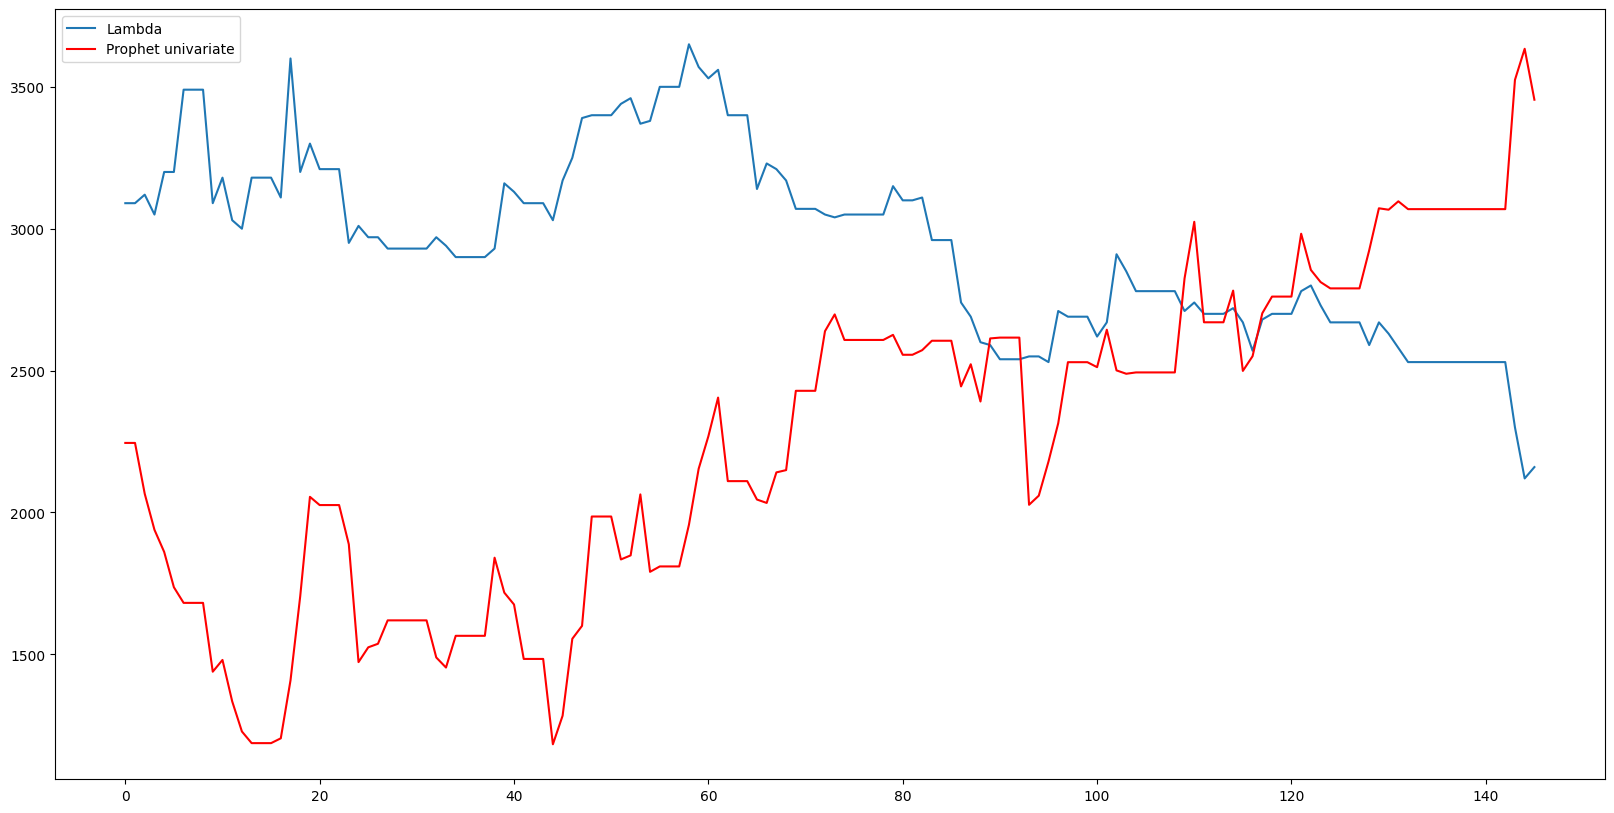

In [127]:
plt.plot(df_test.Lambda.values, label='Lambda')
plt.plot(yhat9.yhat, color='red', label='Prophet univariate')
plt.legend()

In [128]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.Lambda.array, yhat9.yhat.array)
mape9 = mean_absolute_percentage_error(df_test.Lambda.array, yhat9.yhat.array)
mse = mean_squared_error(df_test.Lambda.array, yhat9.yhat.array)
rmse = sqrt(mean_squared_error(df_test.Lambda.array, yhat9.yhat.array))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape9)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 875.6289272775157
Mean Absolute Percentage Error 0.28559615590987364
mean_squared_error 1153512.1337163965
root_mean_squared_error 1074.0168218963781


## Delta

In [129]:
# Prophet needs some specifics data stuff, coment it here
prophet_training10 = df_training.rename(
    columns={'Delta': 'y'})  # old method
prophet_training10['ds'] = prophet_training10.index
prophet_training10.index = pd.RangeIndex(len(prophet_training10.index))

prophet_test10 = df_test.rename(columns={'Delta': 'y'})  # old method
prophet_test10['ds'] = prophet_test10.index
prophet_test10.index = pd.RangeIndex(len(prophet_test10.index))

In [130]:
prophet10 = Prophet(
    growth='linear',
    seasonality_mode='additive',
    holidays=holidays,
    holidays_prior_scale=0.01,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=5
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=20
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=40
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=50
)

In [131]:
prophet10.fit(prophet_training10)
yhat10 = prophet10.predict(prophet_test10)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/rg5355ls.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/3f87syto.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72065', 'data', 'file=/tmp/tmpet62vpyo/rg5355ls.json', 'init=/tmp/tmpet62vpyo/3f87syto.json', 'output', 'file=/tmp/tmpet62vpyo/prophet_modelx3392qca/prophet_model-20240622025153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:51:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:51:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [132]:
yhat10['is_holiday'] = yhat10['ds'].isin(holidays['ds'])

for i in range(1, len(yhat10)):
    if yhat10.loc[i, 'is_holiday']:
        yhat10.loc[i, 'yhat'] = yhat10.loc[i-1, 'yhat']

yhat10.drop(columns=['is_holiday'], inplace=True)

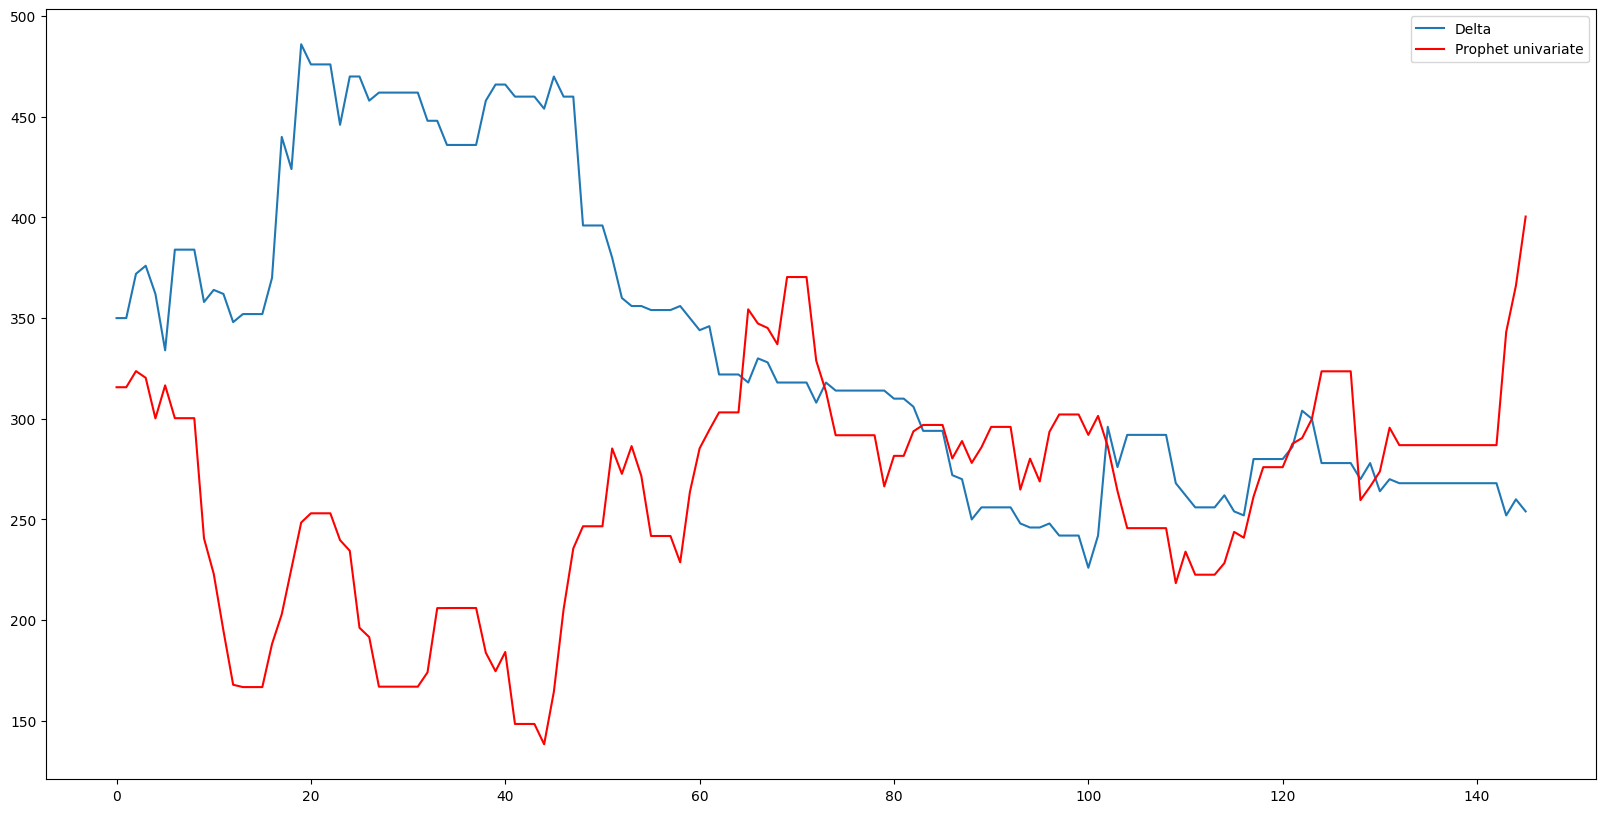

In [133]:
plt.plot(df_test.Delta.values, label='Delta')
plt.plot(yhat10.yhat, color='red', label='Prophet univariate')
plt.legend()

In [134]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.Delta.array, yhat10.yhat.array)
mape10 = mean_absolute_percentage_error(df_test.Delta.array, yhat10.yhat.array)
mse = mean_squared_error(df_test.Delta.array, yhat10.yhat.array)
rmse = sqrt(mean_squared_error(df_test.Delta.array, yhat10.yhat.array))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape10)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 95.39433416256242
Mean Absolute Percentage Error 0.24689875250062124
mean_squared_error 18579.76925223762
root_mean_squared_error 136.3076272709551


## Zeta

In [135]:
# Prophet needs some specifics data stuff, coment it here
prophet_training11 = df_training.rename(
    columns={'Zeta': 'y'})  # old method
prophet_training11['ds'] = prophet_training11.index
prophet_training11.index = pd.RangeIndex(len(prophet_training11.index))

prophet_test11 = df_test.rename(columns={'Zeta': 'y'})  # old method
prophet_test11['ds'] = prophet_test11.index
prophet_test11.index = pd.RangeIndex(len(prophet_test11.index))

In [136]:
prophet11 = Prophet(
    growth='linear',
    seasonality_mode='additive',
    holidays=holidays,
    holidays_prior_scale=0.01,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=5
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=20
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=30
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=55
)

In [137]:
prophet11.fit(prophet_training11)
yhat11 = prophet11.predict(prophet_test11)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/4t4cve1a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/arkf_phr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49716', 'data', 'file=/tmp/tmpet62vpyo/4t4cve1a.json', 'init=/tmp/tmpet62vpyo/arkf_phr.json', 'output', 'file=/tmp/tmpet62vpyo/prophet_modelji9z9xx9/prophet_model-20240622025155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:51:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:51:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [138]:
yhat11['is_holiday'] = yhat11['ds'].isin(holidays['ds'])

for i in range(1, len(yhat11)):
    if yhat11.loc[i, 'is_holiday']:
        yhat11.loc[i, 'yhat'] = yhat11.loc[i-1, 'yhat']

yhat11.drop(columns=['is_holiday'], inplace=True)

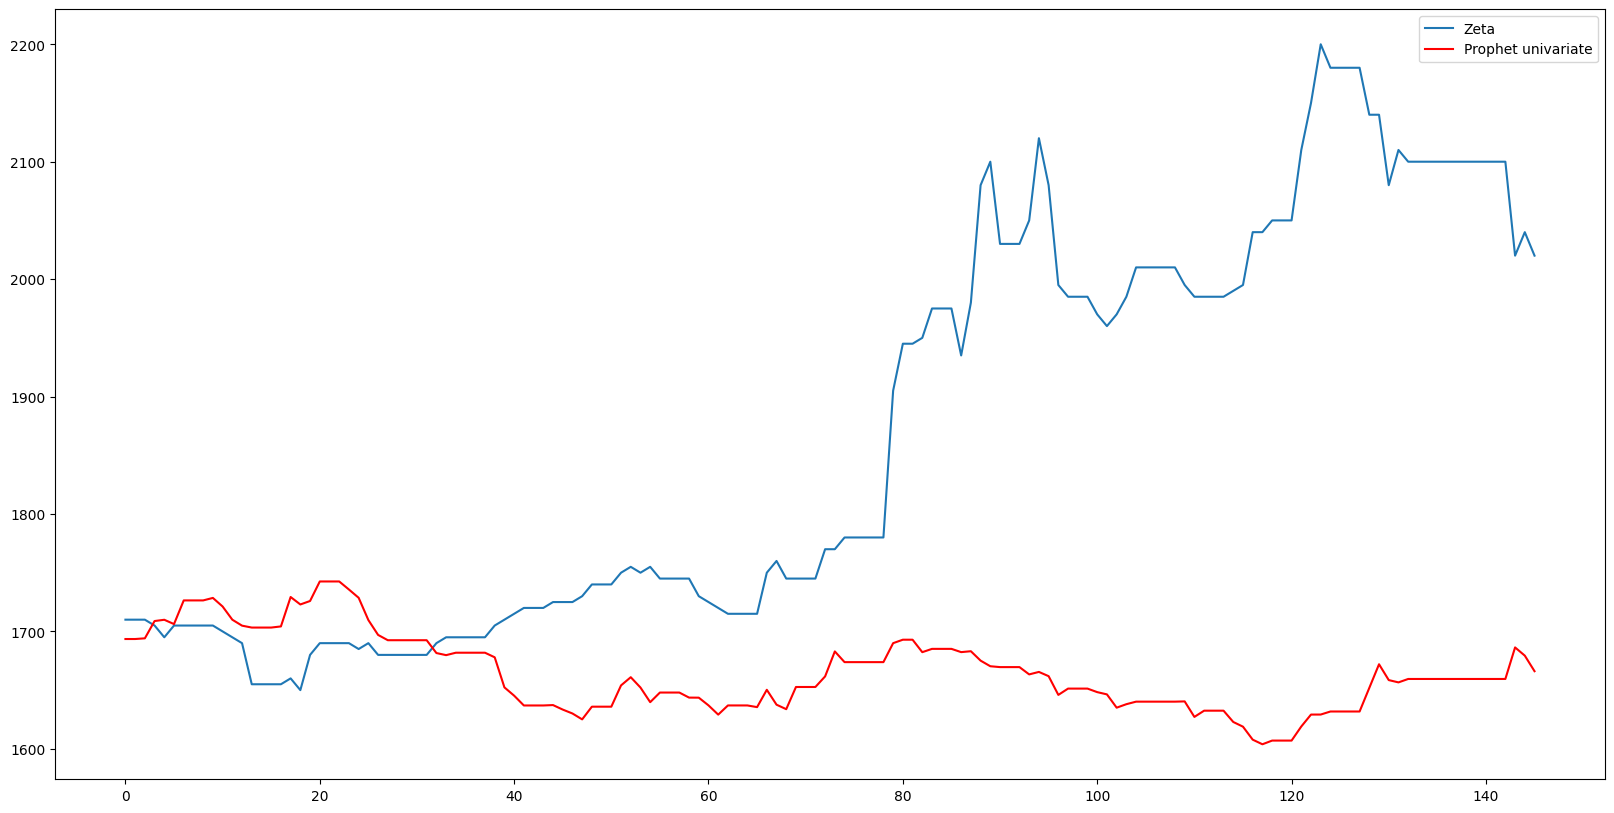

In [139]:
plt.plot(df_test.Zeta.values, label='Zeta')
plt.plot(yhat11.yhat, color='red', label='Prophet univariate')
plt.legend()

In [140]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(df_test.Zeta.array, yhat11.yhat.array)
mape11 = mean_absolute_percentage_error(df_test.Zeta.array, yhat11.yhat.array)
mse = mean_squared_error(df_test.Zeta.array, yhat11.yhat.array)
rmse = sqrt(mean_squared_error(df_test.Zeta.array, yhat11.yhat.array))
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error", mape11)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)

Mean Absolute Error: 213.18968550977442
Mean Absolute Percentage Error 0.10675271870227007
mean_squared_error 76346.9340851811
root_mean_squared_error 276.3094896763068


## Searching Best Fourier Order Parameters

Dilakukan semacam grid search untuk mencari kombinasi fourier order parameter pada algoritma prophet untuk setiap bank yang digunakan agar menghasil kan nilai mape terkecil yang mana berarti nilai akurasi paling besar.

In [141]:
# from itertools import product
# import pandas as pd
# from sklearn.metrics import mean_absolute_percentage_error

# monthly_fourier_orders = [5, 10, 15]
# daily_fourier_orders = [10, 15, 20]
# weekly_fourier_orders = [30, 35, 40]
# yearly_fourier_orders = [30, 40, 50]
# quarterly_fourier_orders = [50, 55, 60]

# # Generate all combinations of Fourier orders
# combinations = list(product(monthly_fourier_orders, daily_fourier_orders, weekly_fourier_orders, yearly_fourier_orders, quarterly_fourier_orders))

# # Initialize results dictionary
# resultsDict = {}

# # Iterate over each combination and fit the model
# for i, combo in enumerate(combinations, 1):
#     monthly, daily, weekly, yearly, quarterly = combo
#     prophet = Prophet(
#         growth='linear',
#         seasonality_mode='additive',
#         holidays=holidays,
#         holidays_prior_scale=0.01,  # Minimize holiday effects
#         daily_seasonality=False,
#         weekly_seasonality=False,
#         yearly_seasonality=False
#     ).add_seasonality(
#         name='monthly',
#         period=30.5,
#         fourier_order=monthly
#     ).add_seasonality(
#         name='daily',
#         period=1,
#         fourier_order=daily
#     ).add_seasonality(
#         name='weekly',
#         period=7,
#         fourier_order=weekly
#     ).add_seasonality(
#         name='yearly',
#         period=365.25,
#         fourier_order=yearly
#     ).add_seasonality(
#         name='quarterly',
#         period=365.25/4,
#         fourier_order=quarterly
#     )

#     # Fit the model
#     prophet.fit(prophet_training11)

#     # Make predictions
#     future_dates = prophet.make_future_dataframe(periods=len(prophet_test11))
#     forecast = prophet.predict(future_dates)

#     # Adjust predictions for holidays
#     forecast['is_holiday'] = forecast['ds'].isin(holidays['ds'])
#     for j in range(1, len(forecast)):
#         if forecast.loc[j, 'is_holiday']:
#             forecast.loc[j, 'yhat'] = forecast.loc[j-1, 'yhat']

#     # Calculate MAPE using the adjusted predictions
#     mape = mean_absolute_percentage_error(prophet_test11['y'], forecast.loc[forecast['ds'].isin(prophet_test11['ds']), 'yhat'])

#     # Store the results
#     combo_name = f'monthly_{monthly}_daily_{daily}_weekly_{weekly}_yearly_{yearly}_quarterly_{quarterly}'
#     resultsDict[combo_name] = mape

#     # Print the results
#     print(f"Iteration {i}: Combination: {combo_name} - MAPE: {mape:.5f}")

# # Find the combination with the smallest MAPE
# best_combo = min(resultsDict, key=resultsDict.get)
# best_mape = resultsDict[best_combo]

# # Print all results at the end
# print("\nAll combinations and their MAPE values:")
# for combo_name, mape in resultsDict.items():
#     print(f"{combo_name}: {mape:.5f}")

# # Print the best combination
# print(f"\nBest combination: {best_combo} - MAPE: {best_mape:.5f}")

# MAPE

setelah dilakukan proses train model untuk setiap bank dilihat mapenya dapat dilihat beberapa bank mape dibawah 10%, namun beberapa bank juga masih ada mape yang rentangnya 10-30% bisa dikarenakan faktor ekternal yang pengaruhnya kuat.

In [142]:
mapes = [mape, mape1, mape2,mape3,mape4,mape5,mape6,mape7,mape8,mape9,mape10,mape11]
nama_bank = ['Beta', 'Gamma', 'Epsilon', 'Alpha', 'Iota', 'Theta', 'Kappa', 'Mu', 'Eta', 'Lambda', 'Delta', 'Zeta']

In [143]:
df_mape = pd.DataFrame({
    'Nama Bank': nama_bank,
    'MAPE': mapes,
})
df_mape['MAPE'] = df_mape['MAPE'] * 100

df_mape['Akurasi'] = 100 - df_mape['MAPE']

df_mape['MAPE'] = df_mape['MAPE'].round(2)
df_mape['Akurasi'] = df_mape['Akurasi'].round(2)

In [144]:
df_mape

Nama Bank   MAPE  Akurasi
0       Beta   3.65    96.35
1      Gamma   5.20    94.80
2    Epsilon   3.13    96.87
3      Alpha  10.40    89.60
4       Iota   5.19    94.81
5      Theta   5.41    94.59
6      Kappa  10.97    89.03
7         Mu   6.95    93.05
8        Eta   6.68    93.32
9     Lambda  28.56    71.44
10     Delta  24.69    75.31
11      Zeta  10.68    89.32

Setelah dilakukan train model, selanjutnya melakukan forecasting menggunakan model yang sudah dilatih untuk setiap bank, dan pada kasus kita ini melakukan forecasting 7 hari kedepan

# Forecast

ditambahkan data holidays baru untuk forecast beberaoa hari ke depan


In [145]:
dates = ['2024-04-20', '2024-04-21', '2024-04-27', '2024-04-28']

new_holidays = pd.DataFrame({
    'holiday': ['market_closed'] * len(dates),
    'ds': pd.to_datetime(dates),
    'lower_window': [0] * len(dates),
    'upper_window': [0] * len(dates),
})

holidays = pd.concat([holidays, new_holidays], ignore_index=True)

holidays = holidays.drop(0).reset_index(drop=True)

holidays['ds'] = holidays['ds'].dt.strftime('%Y-%m-%d')

In [146]:
holidays

Unnamed: 0        holiday          ds  lower_window  upper_window
0           1.0  market_closed  2022-04-24             0             0
1           2.0  market_closed  2022-04-29             0             0
2           3.0  market_closed  2022-04-30             0             0
3           4.0  market_closed  2022-05-01             0             0
4           5.0  market_closed  2022-05-02             0             0
..          ...            ...         ...           ...           ...
250       251.0  market_closed  2024-04-15             0             0
251         NaN  market_closed  2024-04-20             0             0
252         NaN  market_closed  2024-04-21             0             0
253         NaN  market_closed  2024-04-27             0             0
254         NaN  market_closed  2024-04-28             0             0

[255 rows x 5 columns]

## Beta

In [147]:
forecast = df1.rename(
    columns={'Beta': 'y'})
forecast['ds'] = forecast.index
forecast.index = pd.RangeIndex(len(forecast.index))

In [148]:
pBeta = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays=holidays,
    holidays_prior_scale=0.01,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=15
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=30
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=60
)

In [149]:
pBeta.fit(forecast)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/7dwi0wkc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/fsgflp1o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12821', 'data', 'file=/tmp/tmpet62vpyo/7dwi0wkc.json', 'init=/tmp/tmpet62vpyo/fsgflp1o.json', 'output', 'file=/tmp/tmpet62vpyo/prophet_modelrl7vp7y1/prophet_model-20240622025158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:51:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:52:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [150]:
future = pBeta.make_future_dataframe(periods=7)

fBeta = pBeta.predict(future)

In [151]:
fBeta['is_holiday'] = fBeta['ds'].isin(holidays['ds'])

# Loop through fBeta and adjust values to ensure no change during holidays
for i in range(1, len(fBeta)):
    if fBeta.loc[i, 'is_holiday']:
        fBeta.loc[i, 'yhat'] = fBeta.loc[i-1, 'yhat']

# Drop the 'is_holiday' column as it's no longer needed
fBeta.drop(columns=['is_holiday'], inplace=True)

In [152]:
forecast_5_days = fBeta[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

In [153]:
forecast_5_days

ds         yhat   yhat_lower   yhat_upper
732 2024-04-19  5322.973339  5254.207366  5401.484950
733 2024-04-20  5322.973339  5214.902582  5361.693780
734 2024-04-21  5322.973339  5185.504018  5338.616307
735 2024-04-22  5239.153295  5167.575802  5313.609719
736 2024-04-23  5221.793910  5148.206054  5299.038405
737 2024-04-24  5199.781357  5127.297006  5283.568019
738 2024-04-25  5203.167817  5123.534911  5281.255083

## Gamma

In [154]:
forecast1 = df1.rename(
    columns={'Gamma': 'y'})
forecast1['ds'] = forecast1.index
forecast1.index = pd.RangeIndex(len(forecast1.index))

In [155]:
pGamma = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays=holidays,
    holidays_prior_scale=0.01,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=5
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=30
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=60
)

In [156]:
pGamma.fit(forecast1)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/wma9sbws.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/k24zynjn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11589', 'data', 'file=/tmp/tmpet62vpyo/wma9sbws.json', 'init=/tmp/tmpet62vpyo/k24zynjn.json', 'output', 'file=/tmp/tmpet62vpyo/prophet_model6qoxjvx4/prophet_model-20240622025208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:52:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:52:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [157]:
future1 = pGamma.make_future_dataframe(periods=7)

fGamma = pGamma.predict(future1)

In [158]:
fGamma['is_holiday'] = fGamma['ds'].isin(holidays['ds'])

# Loop through fGamma and adjust values to ensure no change during holidays
for i in range(1, len(fGamma)):
    if fGamma.loc[i, 'is_holiday']:
        fGamma.loc[i, 'yhat'] = fGamma.loc[i-1, 'yhat']

# Drop the 'is_holiday' column as it's no longer needed
fGamma.drop(columns=['is_holiday'], inplace=True)

In [159]:
forecast_5_days1 = fGamma[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

In [160]:
forecast_5_days1

ds         yhat   yhat_lower   yhat_upper
732 2024-04-19  1419.391891  1390.310554  1447.163802
733 2024-04-20  1419.391891  1410.690667  1471.766032
734 2024-04-21  1419.391891  1406.263142  1465.766033
735 2024-04-22  1436.301308  1404.377161  1463.356302
736 2024-04-23  1413.936646  1384.089736  1442.477526
737 2024-04-24  1406.086817  1376.917453  1438.000388
738 2024-04-25  1397.727511  1365.142082  1429.115126

## Epsilon

In [161]:
forecast2 = df1.rename(
    columns={'Epsilon': 'y'})
forecast2['ds'] = forecast2.index
forecast2.index = pd.RangeIndex(len(forecast2.index))

In [162]:
pEpsilon = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays=holidays,
    holidays_prior_scale=0.01,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=10
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=15
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=30
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=50
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=50
)

In [163]:
pEpsilon.fit(forecast2)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/2pwod7au.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/_a8v3ymw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54059', 'data', 'file=/tmp/tmpet62vpyo/2pwod7au.json', 'init=/tmp/tmpet62vpyo/_a8v3ymw.json', 'output', 'file=/tmp/tmpet62vpyo/prophet_modelie8wxord/prophet_model-20240622025213.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:52:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:52:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [164]:
future2 = pEpsilon.make_future_dataframe(periods=7)

fEpsilon = pEpsilon.predict(future2)

In [165]:
fEpsilon['is_holiday'] = fEpsilon['ds'].isin(holidays['ds'])

# Loop through fEpsilon and adjust values to ensure no change during holidays
for i in range(1, len(fEpsilon)):
    if fEpsilon.loc[i, 'is_holiday']:
        fEpsilon.loc[i, 'yhat'] = fEpsilon.loc[i-1, 'yhat']

# Drop the 'is_holiday' column as it's no longer needed
fEpsilon.drop(columns=['is_holiday'], inplace=True)

In [166]:
forecast_5_days2 = fEpsilon[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

In [167]:
forecast_5_days2

ds         yhat   yhat_lower   yhat_upper
732 2024-04-19  6603.588086  6524.143104  6681.645248
733 2024-04-20  6603.588086  6475.729355  6641.793817
734 2024-04-21  6603.588086  6438.962749  6598.399796
735 2024-04-22  6468.220843  6390.263799  6550.200348
736 2024-04-23  6421.972679  6341.903195  6503.126899
737 2024-04-24  6401.986290  6316.402463  6492.057755
738 2024-04-25  6404.953027  6318.386518  6493.995389

## Alpha

In [168]:
forecast3 = df1.rename(
    columns={'Alpha': 'y'})
forecast3['ds'] = forecast3.index
forecast3.index = pd.RangeIndex(len(forecast3.index))

In [169]:
pAlpha = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays=holidays,
    holidays_prior_scale=0.01,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=5
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=30
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=60
)

In [170]:
pAlpha.fit(forecast3)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/zq2lcdaa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/1pqmgcqy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2664', 'data', 'file=/tmp/tmpet62vpyo/zq2lcdaa.json', 'init=/tmp/tmpet62vpyo/1pqmgcqy.json', 'output', 'file=/tmp/tmpet62vpyo/prophet_modelxy9mje0u/prophet_model-20240622025222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:52:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:52:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [171]:
future3 = pAlpha.make_future_dataframe(periods=7)

fAlpha = pAlpha.predict(future3)

In [172]:
fAlpha['is_holiday'] = fAlpha['ds'].isin(holidays['ds'])

# Loop through fAlpha and adjust values to ensure no change during holidays
for i in range(1, len(fAlpha)):
    if fAlpha.loc[i, 'is_holiday']:
        fAlpha.loc[i, 'yhat'] = fAlpha.loc[i-1, 'yhat']

# Drop the 'is_holiday' column as it's no longer needed
fAlpha.drop(columns=['is_holiday'], inplace=True)

In [173]:
forecast_5_days3 = fAlpha[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

In [174]:
forecast_5_days3

ds         yhat   yhat_lower   yhat_upper
732 2024-04-19  1276.740976  1263.635706  1291.187760
733 2024-04-20  1276.740976  1246.135447  1272.084907
734 2024-04-21  1276.740976  1232.995057  1260.193085
735 2024-04-22  1246.050570  1233.138295  1259.853477
736 2024-04-23  1237.319221  1223.587203  1251.040919
737 2024-04-24  1237.298736  1223.494025  1251.544657
738 2024-04-25  1239.567206  1225.379969  1253.595568

## Iota

In [175]:
forecast4 = df1.rename(
    columns={'Iota': 'y'})
forecast4['ds'] = forecast4.index
forecast4.index = pd.RangeIndex(len(forecast4.index))

In [176]:
pIota = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays=holidays,
    holidays_prior_scale=0.01,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=10
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=40
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=40
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=50
)

In [177]:
pIota.fit(forecast4)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/qoykla2z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/s484l6tj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99890', 'data', 'file=/tmp/tmpet62vpyo/qoykla2z.json', 'init=/tmp/tmpet62vpyo/s484l6tj.json', 'output', 'file=/tmp/tmpet62vpyo/prophet_modele1154svt/prophet_model-20240622025227.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:52:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:52:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [178]:
future4 = pIota.make_future_dataframe(periods=7)

fIota = pIota.predict(future4)

In [179]:
fIota['is_holiday'] = fIota['ds'].isin(holidays['ds'])

# Loop through fIota and adjust values to ensure no change duNIng holidays
for i in range(1, len(fIota)):
    if fIota.loc[i, 'is_holiday']:
        fIota.loc[i, 'yhat'] = fIota.loc[i-1, 'yhat']

# Drop the 'is_holiday' column as it's no longer needed
fIota.drop(columns=['is_holiday'], inplace=True)

In [180]:
forecast_5_days4 = fIota[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

In [181]:
forecast_5_days4

ds         yhat   yhat_lower   yhat_upper
732 2024-04-19  5120.655519  5052.312325  5188.220427
733 2024-04-20  5120.655519  5020.703915  5160.850203
734 2024-04-21  5120.655519  4995.038399  5142.408836
735 2024-04-22  5080.573357  5009.753218  5157.438610
736 2024-04-23  5044.471868  4965.905780  5123.694525
737 2024-04-24  5031.093654  4953.855548  5112.098730
738 2024-04-25  4993.362672  4910.834063  5077.633457

## Theta


In [182]:
forecast5 = df1.rename(
    columns={'Theta': 'y'})
forecast5['ds'] = forecast5.index
forecast5.index = pd.RangeIndex(len(forecast5.index))

In [183]:
pTheta = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays=holidays,
    holidays_prior_scale=0.01,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=5
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=30
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=50
)

In [184]:
pTheta.fit(forecast5)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/t2r9cxlt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/nx8rxc53.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11491', 'data', 'file=/tmp/tmpet62vpyo/t2r9cxlt.json', 'init=/tmp/tmpet62vpyo/nx8rxc53.json', 'output', 'file=/tmp/tmpet62vpyo/prophet_model7mhftx5y/prophet_model-20240622025234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:52:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:52:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [185]:
future5 = pTheta.make_future_dataframe(periods=7)

fTheta = pTheta.predict(future5)

In [186]:
fTheta['is_holiday'] = fTheta['ds'].isin(holidays['ds'])

# Loop through fTheta and adjust values to ensure no change duCAng holidays
for i in range(1, len(fTheta)):
    if fTheta.loc[i, 'is_holiday']:
        fTheta.loc[i, 'yhat'] = fTheta.loc[i-1, 'yhat']

# Drop the 'is_holiday' column as it's no longer needed
fTheta.drop(columns=['is_holiday'], inplace=True)

In [187]:
forecast_5_days5 = fTheta[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

In [188]:
forecast_5_days5

ds         yhat   yhat_lower   yhat_upper
732 2024-04-19  9449.095591  9343.041332  9552.644996
733 2024-04-20  9449.095591  9369.508844  9573.636386
734 2024-04-21  9449.095591  9325.577236  9539.822374
735 2024-04-22  9385.609309  9282.204276  9486.333345
736 2024-04-23  9302.802949  9200.752905  9408.068193
737 2024-04-24  9263.716624  9144.941975  9371.185431
738 2024-04-25  9215.690984  9102.729788  9333.790669

## Kappa

In [189]:
forecast6 = df1.rename(
    columns={'Kappa': 'y'})
forecast6['ds'] = forecast6.index
forecast6.index = pd.RangeIndex(len(forecast6.index))

In [190]:
pKappa = Prophet(
    growth='linear',
    seasonality_mode='additive',
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=10
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=35
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=40
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=60
)

In [191]:
pKappa.fit(forecast6)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/pz2kfmgt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/yos632ug.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75038', 'data', 'file=/tmp/tmpet62vpyo/pz2kfmgt.json', 'init=/tmp/tmpet62vpyo/yos632ug.json', 'output', 'file=/tmp/tmpet62vpyo/prophet_model60p2uygr/prophet_model-20240622025240.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:52:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:52:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [192]:
future6 = pKappa.make_future_dataframe(periods=7)

fKappa = pKappa.predict(future6)

In [193]:
fKappa['is_holiday'] = fKappa['ds'].isin(holidays['ds'])

# Loop through fKappa and adjust values to ensure no change during holidays
for i in range(1, len(fKappa)):
    if fKappa.loc[i, 'is_holiday']:
        fKappa.loc[i, 'yhat'] = fKappa.loc[i-1, 'yhat']

# Drop the 'is_holiday' column as it's no longer needed
fKappa.drop(columns=['is_holiday'], inplace=True)

In [194]:
forecast_5_days6 = fKappa[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

In [195]:
forecast_5_days6

ds         yhat   yhat_lower   yhat_upper
732 2024-04-19  1139.636983  1073.576150  1210.101801
733 2024-04-20  1139.636983  1040.447104  1173.729932
734 2024-04-21  1139.636983  1035.533356  1173.583552
735 2024-04-22  1138.218451  1071.905662  1202.750337
736 2024-04-23  1128.916130  1058.929675  1198.972462
737 2024-04-24  1117.288381  1051.419032  1186.819315
738 2024-04-25  1102.952402  1035.720969  1167.846346

## Mu

In [196]:
forecast7 = df1.rename(
    columns={'Mu': 'y'})
forecast7['ds'] = forecast7.index
forecast7.index = pd.RangeIndex(len(forecast7.index))

In [197]:
pMu = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays=holidays,
    holidays_prior_scale=0.01,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=10
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=20
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=40
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=50
)

In [198]:
pMu.fit(forecast7)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/l1wihlb1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/qrvwfhke.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59393', 'data', 'file=/tmp/tmpet62vpyo/l1wihlb1.json', 'init=/tmp/tmpet62vpyo/qrvwfhke.json', 'output', 'file=/tmp/tmpet62vpyo/prophet_model688a3irn/prophet_model-20240622025243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:52:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:52:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [199]:
future7 = pMu.make_future_dataframe(periods=7)

fMu = pMu.predict(future7)

In [200]:
fMu['is_holiday'] = fMu['ds'].isin(holidays['ds'])

# Loop through fMu and adjust values to ensure no change during holidays
for i in range(1, len(fMu)):
    if fMu.loc[i, 'is_holiday']:
        fMu.loc[i, 'yhat'] = fMu.loc[i-1, 'yhat']

# Drop the 'is_holiday' column as it's no longer needed
fMu.drop(columns=['is_holiday'], inplace=True)

In [201]:
forecast_5_days7 = fMu[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

In [202]:
forecast_5_days7

ds         yhat   yhat_lower   yhat_upper
732 2024-04-19  5109.520646  5035.681893  5183.786585
733 2024-04-20  5109.520646  5093.081943  5250.329109
734 2024-04-21  5109.520646  5096.186085  5251.214589
735 2024-04-22  5159.835248  5081.206911  5241.244951
736 2024-04-23  5161.430177  5079.657800  5241.195184
737 2024-04-24  5190.598459  5108.833126  5267.415685
738 2024-04-25  5215.883179  5131.406896  5302.258174

## Eta

In [203]:
forecast8 = df1.rename(
    columns={'Eta': 'y'})
forecast8['ds'] = forecast8.index
forecast8.index = pd.RangeIndex(len(forecast8.index))

In [204]:
pEta = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays=holidays,
    holidays_prior_scale=0.01,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=15
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=30
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=50
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=50
)

In [205]:
pEta.fit(forecast8)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/uop6vlfd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/hk39gfr8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66229', 'data', 'file=/tmp/tmpet62vpyo/uop6vlfd.json', 'init=/tmp/tmpet62vpyo/hk39gfr8.json', 'output', 'file=/tmp/tmpet62vpyo/prophet_modelmmdza3wk/prophet_model-20240622025251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:52:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:52:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [206]:
future8 = pEta.make_future_dataframe(periods=7)

fEta = pEta.predict(future8)

In [207]:
fEta['is_holiday'] = fEta['ds'].isin(holidays['ds'])

# Loop through fEta and adjust values to ensure no change during holidays
for i in range(1, len(fEta)):
    if fEta.loc[i, 'is_holiday']:
        fEta.loc[i, 'yhat'] = fEta.loc[i-1, 'yhat']

# Drop the 'is_holiday' column as it's no longer needed
fEta.drop(columns=['is_holiday'], inplace=True)

In [208]:
forecast_5_days8 = fEta[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

In [209]:
forecast_5_days8

ds         yhat   yhat_lower   yhat_upper
732 2024-04-19  2518.278959  2472.231369  2565.956325
733 2024-04-20  2518.278959  2460.627970  2550.535906
734 2024-04-21  2518.278959  2441.944354  2534.349704
735 2024-04-22  2446.721432  2397.996639  2490.728891
736 2024-04-23  2492.420770  2446.868384  2540.153414
737 2024-04-24  2477.424963  2427.598625  2525.988747
738 2024-04-25  2449.567740  2397.169693  2499.506459

## Lambda

In [210]:
forecast9 = df1.rename(
    columns={'Lambda': 'y'})
forecast9['ds'] = forecast9.index
forecast9.index = pd.RangeIndex(len(forecast9.index))

In [211]:
pLambda = Prophet(
    growth='linear',
    seasonality_mode='additive',
    holidays=holidays,
    holidays_prior_scale=0.01,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=15
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=10
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=30
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=50
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=60
)

In [212]:
pLambda.fit(forecast9)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/2g4v_0v2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/rmvl4jiv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52777', 'data', 'file=/tmp/tmpet62vpyo/2g4v_0v2.json', 'init=/tmp/tmpet62vpyo/rmvl4jiv.json', 'output', 'file=/tmp/tmpet62vpyo/prophet_modelfxf57kvf/prophet_model-20240622025256.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:52:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:52:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [213]:
future9 = pLambda.make_future_dataframe(periods=7)

fLambda = pLambda.predict(future9)

In [214]:
fLambda['is_holiday'] = fLambda['ds'].isin(holidays['ds'])

# Loop through fLambda and adjust values to ensure no change during holidays
for i in range(1, len(fLambda)):
    if fLambda.loc[i, 'is_holiday']:
        fLambda.loc[i, 'yhat'] = fLambda.loc[i-1, 'yhat']

# Drop the 'is_holiday' column as it's no longer needed
fLambda.drop(columns=['is_holiday'], inplace=True)

In [215]:
forecast_5_days9 = fLambda[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

In [216]:
forecast_5_days9

ds         yhat   yhat_lower   yhat_upper
732 2024-04-19  2635.873946  2202.493304  3050.094048
733 2024-04-20  2635.873946  2150.227526  3036.809393
734 2024-04-21  2635.873946  2263.635611  3067.915641
735 2024-04-22  2831.148776  2385.804425  3232.018406
736 2024-04-23  2928.780175  2498.293060  3380.929785
737 2024-04-24  3021.537824  2591.357171  3430.552474
738 2024-04-25  3102.708356  2687.685870  3517.311598

## Delta

In [217]:
forecast10 = df1.rename(
    columns={'Delta': 'y'})
forecast10['ds'] = forecast10.index
forecast10.index = pd.RangeIndex(len(forecast10.index))

In [218]:
pDelta = Prophet(
    growth='linear',
    seasonality_mode='additive',
    holidays=holidays,
    holidays_prior_scale=0.01,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=5
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=20
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=40
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=50
)

In [219]:
pDelta.fit(forecast10)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/vxrqdjvy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/8cncxhvt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46665', 'data', 'file=/tmp/tmpet62vpyo/vxrqdjvy.json', 'init=/tmp/tmpet62vpyo/8cncxhvt.json', 'output', 'file=/tmp/tmpet62vpyo/prophet_modelrduqbqfj/prophet_model-20240622025300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:53:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:53:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [220]:
future10 = pDelta.make_future_dataframe(periods=7)

fDelta = pDelta.predict(future10)

In [221]:
fDelta['is_holiday'] = fDelta['ds'].isin(holidays['ds'])

# Loop through fDelta and adjust values to ensure no change duYBng holidays
for i in range(1, len(fDelta)):
    if fDelta.loc[i, 'is_holiday']:
        fDelta.loc[i, 'yhat'] = fDelta.loc[i-1, 'yhat']

# Drop the 'is_holiday' column as it's no longer needed
fDelta.drop(columns=['is_holiday'], inplace=True)

In [222]:
forecast_5_days10 = fDelta[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

In [223]:
forecast_5_days10

ds        yhat  yhat_lower  yhat_upper
732 2024-04-19  300.585710  233.191668  368.357749
733 2024-04-20  300.585710  242.313952  379.166525
734 2024-04-21  300.585710  240.273952  375.232430
735 2024-04-22  301.743482  232.018895  369.073131
736 2024-04-23  299.942167  234.550948  367.911432
737 2024-04-24  296.776464  231.259523  365.640651
738 2024-04-25  278.763336  207.630003  342.336108

## Zeta

In [224]:
forecast11 = df1.rename(
    columns={'Zeta': 'y'})
forecast11['ds'] = forecast11.index
forecast11.index = pd.RangeIndex(len(forecast11.index))

In [225]:
pZeta = Prophet(
    growth='linear',
    seasonality_mode='additive',
    holidays=holidays,
    holidays_prior_scale=0.01,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=5
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=20
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=30
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=30
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=55
)

In [226]:
pZeta.fit(forecast11)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/utjy2466.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet62vpyo/i0nd1yal.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66354', 'data', 'file=/tmp/tmpet62vpyo/utjy2466.json', 'init=/tmp/tmpet62vpyo/i0nd1yal.json', 'output', 'file=/tmp/tmpet62vpyo/prophet_model7m155lvm/prophet_model-20240622025304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:53:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:53:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [227]:
future11 = pZeta.make_future_dataframe(periods=7)

fZeta = pZeta.predict(future11)

In [228]:
fZeta['is_holiday'] = fZeta['ds'].isin(holidays['ds'])

# Loop through fZeta and adjust values to ensure no change during holidays
for i in range(1, len(fZeta)):
    if fZeta.loc[i, 'is_holiday']:
        fZeta.loc[i, 'yhat'] = fZeta.loc[i-1, 'yhat']

# Drop the 'is_holiday' column as it's no longer needed
fZeta.drop(columns=['is_holiday'], inplace=True)

In [229]:
forecast_5_days11 = fZeta[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

In [230]:
forecast_5_days11

ds         yhat   yhat_lower   yhat_upper
732 2024-04-19  2098.408976  2070.860717  2128.032315
733 2024-04-20  2098.408976  2084.387691  2139.655999
734 2024-04-21  2098.408976  2091.562355  2146.931136
735 2024-04-22  2127.710688  2098.807119  2157.224808
736 2024-04-23  2127.826527  2100.057592  2156.605970
737 2024-04-24  2129.768168  2100.928774  2159.076571
738 2024-04-25  2126.350173  2100.444014  2158.207053

# Save Result

## Train Test

Forecasting telah dilakukan untuk seluruh bank, selanjutnya hasil dari forecasting dan train model sebelumnya dimasukan ke dalam csv untuk digunakan nantinya pada dashboard

In [231]:
data = {
    'Date': df_test.index,
    'Beta': yhat.yhat.array,
    'Gamma': yhat1.yhat.array,
    'Delta': yhat10.yhat.array,
    'Epsilon': yhat2.yhat.array,
    'Zeta': yhat11.yhat.array,
    'Eta': yhat8.yhat.array,
    'Theta': yhat5.yhat.array,
    'Iota': yhat4.yhat.array,
    'Kappa': yhat6.yhat.array,
    'Lambda': yhat9.yhat.array,
    'Mu': yhat7.yhat.array,
    'Alpha': yhat3.yhat.array,
}

In [232]:
df_forecast = pd.DataFrame(data)

In [233]:
df_forecast

Date         Beta        Gamma       Delta      Epsilon  \
0   2023-11-25  5040.931166  1230.003909  315.666044  5597.865476   
1   2023-11-26  5040.931166  1230.003909  315.666044  5597.865476   
2   2023-11-27  5070.877879  1259.051614  323.673392  5660.076897   
3   2023-11-28  5196.294784  1280.407736  320.350273  5678.341775   
4   2023-11-29  5170.999588  1292.089593  300.197905  5666.231891   
..         ...          ...          ...         ...          ...   
141 2024-04-14  6063.748219  1398.805001  286.904353  7306.280673   
142 2024-04-15  6063.748219  1398.805001  286.904353  7306.280673   
143 2024-04-16  6575.190133  1491.074213  343.129070  7384.110226   
144 2024-04-17  6496.858691  1495.888112  366.135518  7379.749519   
145 2024-04-18  6437.594046  1501.597867  400.434468  7280.414384   

            Zeta          Eta        Theta         Iota        Kappa  \
0    1693.524482  1672.810492  8771.523044  4935.232153  1104.018082   
1    1693.524482  1672.810492  8771.523044  4935.232153  1104.018082   
2    1694.113925  1668.358683  8819.637768  5019.827312  1126.872407   
3    1708.834397  1652.861273  8872.913669  5147.963869  1126.937316   
4    1709.918187  1632.581293  8882.423595  5186.646211  1123.118540   
..           ...          ...          ...          ...          ...   
141  1659.504655  2632.908652  9436.443280  6222.911223  1250.536945   
142  1659.504655  2632.908652  9436.443280  6222.911223  1250.536945   
143  1686.365489  2629.437604  9984.453282  6471.376208  1427.448894   
144  1679.371544  2660.363710  9998.809049  6438.210837  1420.774304   
145  1666.125427  2628.580013  9950.645446  6356.605487  1417.881385   

          Lambda           Mu        Alpha  
0    2245.122050  5060.206693  1045.170361  
1    2245.122050  5060.206693  1045.170361  
2    2065.806876  5050.686345  1058.551039  
3    1939.097835  5092.525005  1065.820868  
4    1860.997209  5051.768691  1082.005908  
..           ...          ...          ...  
141  3068.999933  5471.188439  1028.809383  
142  3068.999933  5471.188439  1028.809383  
143  3524.539769  5648.798480  1078.300076  
144  3634.100942  5584.004929  1078.816742  
145  3454.627170  5557.538247  1069.706665  

[146 rows x 13 columns]

In [234]:
df_forecast.to_csv("evaluasi.csv")

## Forecast

In [235]:
result = {
    'Date': forecast_5_days.ds,
    'Beta': forecast_5_days.yhat.array,
    'Gamma': forecast_5_days1.yhat.array,
    'Delta': forecast_5_days10.yhat.array,
    'Epsilon': forecast_5_days2.yhat.array,
    'Zeta': forecast_5_days11.yhat.array,
    'Eta': forecast_5_days8.yhat.array,
    'Theta': forecast_5_days5.yhat.array,
    'Iota': forecast_5_days4.yhat.array,
    'Kappa': forecast_5_days6.yhat.array,
    'Lambda': forecast_5_days9.yhat.array,
    'Mu': forecast_5_days7.yhat.array,
    'Alpha': forecast_5_days3.yhat.array,
}

In [236]:
fcast = pd.DataFrame(result)
fcast['Date'] = pd.to_datetime(fcast['Date'])
fcast = fcast.set_index('Date')

In [237]:
fcast.head(5)

Beta        Gamma       Delta      Epsilon         Zeta  \
Date                                                                         
2024-04-19  5322.973339  1419.391891  300.585710  6603.588086  2098.408976   
2024-04-20  5322.973339  1419.391891  300.585710  6603.588086  2098.408976   
2024-04-21  5322.973339  1419.391891  300.585710  6603.588086  2098.408976   
2024-04-22  5239.153295  1436.301308  301.743482  6468.220843  2127.710688   
2024-04-23  5221.793910  1413.936646  299.942167  6421.972679  2127.826527   

                    Eta        Theta         Iota        Kappa       Lambda  \
Date                                                                          
2024-04-19  2518.278959  9449.095591  5120.655519  1139.636983  2635.873946   
2024-04-20  2518.278959  9449.095591  5120.655519  1139.636983  2635.873946   
2024-04-21  2518.278959  9449.095591  5120.655519  1139.636983  2635.873946   
2024-04-22  2446.721432  9385.609309  5080.573357  1138.218451  2831.148776   
2024-04-23  2492.420770  9302.802949  5044.471868  1128.916130  2928.780175   

                     Mu        Alpha  
Date                                  
2024-04-19  5109.520646  1276.740976  
2024-04-20  5109.520646  1276.740976  
2024-04-21  5109.520646  1276.740976  
2024-04-22  5159.835248  1246.050570  
2024-04-23  5161.430177  1237.319221

In [238]:
fcast.to_csv('Forecast.csv')

In [239]:
combined_df = pd.concat([df1, fcast], ignore_index=True)

In [240]:
combined_df.tail(15)

Beta        Gamma       Delta      Epsilon         Zeta  \
724  5650.000000  1500.000000  268.000000  6825.000000  2100.000000   
725  5650.000000  1500.000000  268.000000  6825.000000  2100.000000   
726  5650.000000  1500.000000  268.000000  6825.000000  2100.000000   
727  5650.000000  1500.000000  268.000000  6825.000000  2100.000000   
728  5650.000000  1500.000000  268.000000  6825.000000  2100.000000   
729  5350.000000  1400.000000  252.000000  6625.000000  2020.000000   
730  5300.000000  1375.000000  260.000000  6625.000000  2040.000000   
731  5475.000000  1420.000000  254.000000  6800.000000  2020.000000   
732  5322.973339  1419.391891  300.585710  6603.588086  2098.408976   
733  5322.973339  1419.391891  300.585710  6603.588086  2098.408976   
734  5322.973339  1419.391891  300.585710  6603.588086  2098.408976   
735  5239.153295  1436.301308  301.743482  6468.220843  2127.710688   
736  5221.793910  1413.936646  299.942167  6421.972679  2127.826527   
737  5199.781357  1406.086817  296.776464  6401.986290  2129.768168   
738  5203.167817  1397.727511  278.763336  6404.953027  2126.350173   

             Eta        Theta         Iota        Kappa       Lambda  \
724  2700.000000  9825.000000  5300.000000  1000.000000  2530.000000   
725  2700.000000  9825.000000  5300.000000  1000.000000  2530.000000   
726  2700.000000  9825.000000  5300.000000  1000.000000  2530.000000   
727  2700.000000  9825.000000  5300.000000  1000.000000  2530.000000   
728  2700.000000  9825.000000  5300.000000  1000.000000  2530.000000   
729  2550.000000  9475.000000  5200.000000   980.000000  2300.000000   
730  2480.000000  9525.000000  5250.000000   955.000000  2120.000000   
731  2600.000000  9475.000000  5300.000000   990.000000  2160.000000   
732  2518.278959  9449.095591  5120.655519  1139.636983  2635.873946   
733  2518.278959  9449.095591  5120.655519  1139.636983  2635.873946   
734  2518.278959  9449.095591  5120.655519  1139.636983  2635.873946   
735  2446.721432  9385.609309  5080.573357  1138.218451  2831.148776   
736  2492.420770  9302.802949  5044.471868  1128.916130  2928.780175   
737  2477.424963  9263.716624  5031.093654  1117.288381  3021.537824   
738  2449.567740  9215.690984  4993.362672  1102.952402  3102.708356   

              Mu        Alpha  
724  5150.000000  1350.000000  
725  5150.000000  1350.000000  
726  5150.000000  1350.000000  
727  5150.000000  1350.000000  
728  5150.000000  1350.000000  
729  5075.000000  1300.000000  
730  5175.000000  1300.000000  
731  5150.000000  1310.000000  
732  5109.520646  1276.740976  
733  5109.520646  1276.740976  
734  5109.520646  1276.740976  
735  5159.835248  1246.050570  
736  5161.430177  1237.319221  
737  5190.598459  1237.298736  
738  5215.883179  1239.567206

## Return

dikarenakan tujuan awal tim adalah untuk menentukan Value at Risk, perhitungan tersebut dibutuhkan nilai return untuk setiap bank, maka dicari lah returnya

In [241]:
returns = combined_df.pct_change().dropna()

In [242]:
returns.tail(7)

Beta     Gamma     Delta   Epsilon      Zeta       Eta     Theta  \
732 -0.027767 -0.000428  0.183408 -0.028884  0.038816 -0.031431 -0.002734   
733  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
734  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
735 -0.015747  0.011913  0.003852 -0.020499  0.013964 -0.028415 -0.006719   
736 -0.003313 -0.015571 -0.005970 -0.007150  0.000054  0.018678 -0.008823   
737 -0.004216 -0.005552 -0.010554 -0.003112  0.000912 -0.006017 -0.004202   
738  0.000651 -0.005945 -0.060696  0.000463 -0.001605 -0.011244 -0.005184   

         Iota     Kappa    Lambda        Mu     Alpha  
732 -0.033839  0.151148  0.220312 -0.007860 -0.025389  
733  0.000000  0.000000  0.000000  0.000000  0.000000  
734  0.000000  0.000000  0.000000  0.000000  0.000000  
735 -0.007828 -0.001245  0.074084  0.009847 -0.024038  
736 -0.007106 -0.008173  0.034485  0.000309 -0.007007  
737 -0.002652 -0.010300  0.031671  0.005651 -0.000017  
738 -0.007500 -0.012831  0.026864  0.004871  0.001833

## Volatility

Standar deviasi juga digunakan untuk perhitungan VaR, namun selain itu digunakan Std ini juga untuk penentuan kestabilan setiap saham

In [243]:
std_devs = returns.std()
std_devs = pd.DataFrame(list(std_devs.items()), columns=['Bank', 'Volatility'])

In [244]:
std_devs.set_index('Bank', inplace=True)

In [245]:
std_devs

Volatility
Bank               
Beta       0.012250
Gamma      0.014576
Delta      0.037594
Epsilon    0.013366
Zeta       0.011136
Eta        0.020607
Theta      0.010425
Iota       0.012179
Kappa      0.027269
Lambda     0.038979
Mu         0.014967
Alpha      0.012634

## Value at Risk

Setelah dilakukan beberapa perhitungan variable yang dibutuhkan untuk menghitung VaR, selanjutnya dilakukan perhitungan VaR dengan menggunakan metode monte carlo, num simulasi sebanyak 10000, hari hold period selama 7 hari dan confidence levelnya 95%.

In [246]:
num_simulations = 10000
num_days = 7
confidence_level = 0.95

In [247]:
def monte_carlo_var(returns, num_simulations, num_days, confidence_level):
    mean_returns = returns.mean()
    std_dev_returns = returns.std()

    simulated_end_prices = np.zeros((num_simulations, len(returns.columns)))

    for i in range(num_simulations):
        simulated_return = np.random.normal(mean_returns, std_dev_returns, (num_days, len(returns.columns)))
        simulated_end_prices[i, :] = (1 + simulated_return).prod(axis=0)

    simulated_returns = pd.DataFrame(simulated_end_prices, columns=returns.columns)
    simulated_loss = simulated_returns.apply(lambda x: 1 - x)

    var = simulated_loss.quantile(1 - confidence_level)

    return var

In [248]:
var_results = monte_carlo_var(returns, num_simulations, num_days, confidence_level)

var_results = pd.DataFrame(var_results)

In [249]:
var_results.rename(columns={0.050000000000000044: 'VaR'}, inplace=True)

In [250]:
var_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Beta to Alpha
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VaR     12 non-null     float64
dtypes: float64(1)
memory usage: 492.0+ bytes


In [251]:
# df.set_index('Bank', inplace=True)

# Investasi dalam Rupiah
investment_levels = [100000000, 500000000, 1000000000]

# Menambahkan kolom untuk setiap level investasi dan menghitung kerugian potensial
for investment in investment_levels:
    column_name = f'Loss_{investment:,} IDR'
    var_results[column_name] = -var_results['VaR'] * investment

# Final Result

Setelah dilakukan perhitungan VaR, hasil hasil tersebut dimasukan ke dalan dataset csv yang digunakan nantinya untuk visualisasi pada dashboard

In [252]:
final_df = pd.merge(var_results, std_devs, left_index=True, right_index=True, how='outer')

In [253]:
final_df1 = pd.merge(final_df, df_mape, left_index=True, right_on='Nama Bank', how='outer')

In [254]:
final_df1.set_index('Nama Bank', inplace=True)

Ini merupakan hasil akhir, insight yang didapatkan dari hasil pemodelan

In [255]:
final_df1

VaR  Loss_100,000,000 IDR  Loss_500,000,000 IDR  \
Nama Bank                                                         
Beta      -0.057656          5.765577e+06          2.882789e+07   
Gamma     -0.066406          6.640649e+06          3.320324e+07   
Delta     -0.155717          1.557168e+07          7.785840e+07   
Epsilon   -0.067356          6.735650e+06          3.367825e+07   
Zeta      -0.056784          5.678413e+06          2.839206e+07   
Eta       -0.099389          9.938896e+06          4.969448e+07   
Theta     -0.048582          4.858193e+06          2.429096e+07   
Iota      -0.056974          5.697354e+06          2.848677e+07   
Kappa     -0.120182          1.201816e+07          6.009079e+07   
Lambda    -0.164835          1.648350e+07          8.241749e+07   
Mu        -0.065524          6.552430e+06          3.276215e+07   
Alpha     -0.063889          6.388917e+06          3.194459e+07   

           Loss_1,000,000,000 IDR  Volatility   MAPE  Akurasi  
Nama Bank                                                      
Beta                 5.765577e+07    0.012250   3.65    96.35  
Gamma                6.640649e+07    0.014576   5.20    94.80  
Delta                1.557168e+08    0.037594  24.69    75.31  
Epsilon              6.735650e+07    0.013366   3.13    96.87  
Zeta                 5.678413e+07    0.011136  10.68    89.32  
Eta                  9.938896e+07    0.020607   6.68    93.32  
Theta                4.858193e+07    0.010425   5.41    94.59  
Iota                 5.697354e+07    0.012179   5.19    94.81  
Kappa                1.201816e+08    0.027269  10.97    89.03  
Lambda               1.648350e+08    0.038979  28.56    71.44  
Mu                   6.552430e+07    0.014967   6.95    93.05  
Alpha                6.388917e+07    0.012634  10.40    89.60

In [256]:
final_df1.to_csv("final_data.csv")